# **Project: Analysis of the Polish Used Car Market**

### **About the Dataset**
This dataset was scraped from *otomoto.pl*, one of Poland's largest online platforms for buying and selling both new and used cars. It contains comprehensive details about various car listings, providing valuable insights into the Polish used car market.

### **Dataset Features:**
- **`brand`**: The car manufacturer (e.g., *Volkswagen, Toyota, BMW, Ford*).  
- **`model`**: The specific model of the car.  
- **`price_in_pln`**: The listed price of the car in Polish Zloty (PLN), offering insights into price trends across different cars.  
- **`mileage`**: The total distance the car has been driven in kilometers, serving as an indicator of the car's usage.  
- **`gearbox`**: The type of transmission (either *manual* or *automatic*).  
- **`engine_capacity`**: The engine's size, measured in cubic centimeters (cc), indicating the car's engine capacity.  
- **`fuel_type`**: The fuel type used by the car, such as *petrol, diesel, hybrid, electric*.  
- **`city`**: The city where the car is located or advertised for sale, helping to understand regional variations in car availability.  
- **`voivodeship`**: The administrative region or voivodeship where the city is located, offering a more granular view of car distribution across Poland.  
- **`year`**: The car's manufacturing year, which allows for analysis based on age and trends over time.

### **Key Questions for Exploration:**
1. **Which are the most common car brands in the Polish market?**  
2. **What are the average prices of cars in different categories?**  
3. **Which regions have the highest volume of used car listings?**  
4. **How is the used car market distributed across Poland’s regions?**

### **Objective:**
Through exploratory data analysis (EDA), this project seeks to uncover insights into the Polish used car market. The findings will help us understand pricing trends, popular car brands, and regional variations. Furthermore, these insights can lay the groundwork for future predictive models, helping car buyers, sellers, and dealers make more informed decisions.

### Import libraries and load data

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
uc_data = pd.read_csv('data.csv')
print(uc_data.head())


        brand                            model  price_in_pln     mileage  \
0  alfa-romeo  Alfa Romeo Spider 2.0-16 TSpark       14700.0  133 760 km   
1  alfa-romeo    Alfa Romeo GTV 2.0 16v TSpark       14000.0  133 760 km   
2  alfa-romeo  Alfa Romeo 164 2.0 TSpark Super        4500.0  227 000 km   
3  alfa-romeo     Alfa Romeo Spider 2.0 TSpark       17100.0  227 000 km   
4  alfa-romeo    Alfa Romeo 156 1.6 TSpark 16v        3900.0  239 000 km   

  gearbox engine_capacity    fuel_type       city         voivodeship  year  
0  manual       1 970 cm3      Benzyna       Łask             Łódzkie  1998  
1  manual       1 970 cm3      Benzyna      Mława         Mazowieckie  1998  
2  manual       1 970 cm3      Benzyna    Chełmża  Kujawsko-pomorskie  1996  
3  manual       1 970 cm3      Benzyna      Jasło        Podkarpackie  1996  
4  manual       1 995 cm3  Benzyna+LPG  Pabianice             Łódzkie  1995  


In [ ]:
# Display the shape of the dataset
print('#Shape')
print(uc_data.shape)

# Display the information about the dataset (data types, non-null counts)
print('\n #Info:')
print(uc_data.info())

# Display the column names in the dataset
print('\n #Column names')
print(uc_data.columns)

# Display the number of missing (NaN) values for each column
print('\n #Null values:')
print(uc_data.isna().sum())

# Display summary statistics for all columns (including categorical ones)
print('\n #Describe:')
print(uc_data.describe(include = 'all'))

# Display the number of unique values in each column
print('\n #Unique values:')
print(uc_data.nunique())


#Shape
(91523, 10)

 #Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   mileage          91523 non-null  object 
 4   gearbox          91523 non-null  object 
 5   engine_capacity  91523 non-null  object 
 6   fuel_type        91523 non-null  object 
 7   city             91523 non-null  object 
 8   voivodeship      91523 non-null  object 
 9   year             91523 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.0+ MB
None

 #Column names
Index(['brand', 'model', 'price_in_pln', 'mileage', 'gearbox',
       'engine_capacity', 'fuel_type', 'city', 'voivodeship', 'year'],
      dtype='object')

 #Null values:
brand              0
model              0
price_in_pln       0
mil

### Explanation of Output:

- **Shape**: This provides the number of rows and columns in the dataset, giving you an overview of its size.
  
- **Info**: Displays detailed information about the dataset, such as the data types of each column and the number of non-null values. This helps you understand the structure of the data and whether any columns have missing values.

- **Column names**: Lists all the column names in the dataset, allowing you to verify the features present.

- **Null values**: Shows the count of missing (NaN) values for each column. This is crucial for identifying columns that need data cleaning or imputation before performing any analysis.

- **Describe**: Generates summary statistics for both numerical and categorical columns. For numerical columns, it will provide measures like mean, standard deviation, min, max, and quartiles. For categorical columns, it will show counts, unique values, and the most frequent categories.

- **Unique values**: Displays the number of unique entries in each column, which is particularly useful for identifying categorical columns with a small number of unique entries. This can help in understanding the diversity of values in each column and potentially guide preprocessing steps.

By running this code, you will get an overview of your dataset's structure, data types, and missing values. This is the first step in ensuring your data is clean and ready for further analysis.


### Data Cleaning

Before proceeding with any analysis, it's important to clean the dataset to ensure that the data is accurate, consistent, and ready for analysis. The initial check of the dataframe suggests that there might be some incorrect or missing values. Below are the steps we can take to clean the data:

1. **Handling Missing Values**: 
    - Missing values can cause issues in analysis, especially when performing statistical calculations or training models. We can identify which columns contain missing data and decide whether to drop those rows or fill in the missing values with suitable imputation methods (mean, median, mode, or a custom value).
    
    - For example, for columns like `price_in_pln`, we may not want to lose data, so we might opt to fill missing values with the median or the mean. For categorical columns, such as `fuel_type`, we could replace missing values with the most frequent category.

2. **Identifying and Removing Duplicates**:
    - Sometimes, the dataset may contain duplicate entries. We need to check if any rows are repeated and remove them to avoid any skewed analysis.

3. **Outlier Detection**:
    - Outliers can distort statistical analyses. We should visually inspect or use statistical methods (e.g., z-scores or interquartile range) to detect outliers in numerical columns such as `price_in_pln`, `mileage`, or `engine_capacity`.
    
    - If we find outliers, we may choose to remove them or cap the values to a reasonable range based on domain knowledge.

4. **Data Type Corrections**:
    - Ensure that the data types for each column are appropriate (e.g., `price_in_pln` and `mileage` should be numeric, `year` should be an integer, etc.). Incorrect data types can cause issues in analysis and visualization.

5. **Handling Incorrect Values**:
    - Some columns may contain incorrect or illogical values, such as negative prices or mileage values. We need to define rules for what constitutes valid data in each column and remove or correct the invalid values.

After cleaning the data, we will have a more reliable dataset to proceed with in-depth analysis and modeling.


In [ ]:
#incorrect mileage
print(f"'engine_capacity' column contains {uc_data['engine_capacity'].str.contains('km').sum()} milage data")
print(f"'fuel_type' column contains {uc_data['fuel_type'].str.contains('km').sum()} milage data")
print(f"'year' column contains {uc_data['year'].str.contains('km').sum()} milage data")
print(f"'brand' column contains {uc_data['brand'].str.contains('km').sum()} milage data")
print(f"'model' column contains {uc_data['model'].str.contains('km').sum()} milage data")
print(f"'voivodeship' column contains {uc_data['voivodeship'].str.contains('km').sum()} milage data")
print(f"'city' column contains {uc_data['city'].str.contains('km').sum()} milage data")


'engine_capacity' column contains 222 milage data
'fuel_type' column contains 4850 milage data
'year' column contains 424 milage data
'brand' column contains 0 milage data
'model' column contains 0 milage data
'voivodeship' column contains 0 milage data
'city' column contains 0 milage data


In [101]:
#incorrect engine capacity
print(f"'fuel_type' column contains {uc_data['fuel_type'].str.contains('cm3').sum()} engine capacity data")
print(f"'mileage' column contains {uc_data['mileage'].str.contains('cm3').sum()} engine capacity data")
print(f"'year' column contains {uc_data['year'].str.contains('cm3').sum()} engine capacity data")
print(f"'brand' column contains {uc_data['brand'].str.contains('cm3').sum()} engine capacity data")
print(f"'city' column contains {uc_data['city'].str.contains('cm3').sum()} engine capacity data")
print(f"'model' column contains {uc_data['model'].str.contains('cm3').sum()} engine capacity data")
print(f"'voivodeship' column contains {uc_data['voivodeship'].str.contains('cm3').sum()} engine capacity data")


'fuel_type' column contains 90 engine capacity data
'mileage' column contains 131 engine capacity data
'year' column contains 4516 engine capacity data
'brand' column contains 0 engine capacity data
'city' column contains 0 engine capacity data
'model' column contains 0 engine capacity data
'voivodeship' column contains 0 engine capacity data


In [102]:
def clean_frame(frame, column, column_new, pattern, column_list):
    """
    Cleans a DataFrame column by extracting patterns and filling missing values from other columns.

    Parameters:
    frame (pd.DataFrame): The input DataFrame.
    column (str): The column to extract patterns from.
    column_new (str): The name of the new column to store extracted data.
    pattern (str): Regular expression pattern to extract values.
    column_list (list): List of columns to use for filling missing values in column_new.

    Returns:
    pd.DataFrame: The cleaned DataFrame with column_new updated.
    """
    # Extract pattern from the primary column
    frame[column_new] = frame[column].str.extract(pattern, expand=False)

    # Fill missing values in column_new using other columns in column_list
    for val in column_list:
        if frame[column_new].isna().sum() != 0:
            frame[column_new] = (
                frame[column_new]
                .fillna(frame[frame[column_new].isna()][val].str.extract(pattern, expand=False))
            )
        else:
            continue
    
    return frame


In [103]:
uc_data_clean = uc_data.copy()
uc_data_clean.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


In [104]:
uc_data_clean['mileage'] = uc_data_clean['mileage'].str.replace(' ','')
uc_data_clean['engine_capacity'] = uc_data_clean['engine_capacity'].str.replace(' ','')
uc_data_clean.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133760km,manual,1970cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133760km,manual,1970cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227000km,manual,1970cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227000km,manual,1970cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239000km,manual,1995cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


In [105]:
clean_frame(uc_data_clean, 'year', 'year_clean', '(\\d{4})', ['mileage','engine_capacity','fuel_type','city'])
clean_frame(uc_data_clean,'mileage','mileage_clean','(.*(?:km))',['engine_capacity','fuel_type','city','year'])
clean_frame(uc_data_clean, 'engine_capacity', 'engine_capacity_clean', '(.*(?:cm))',['mileage','fuel_type','city','year'])
clean_frame(uc_data_clean, 'fuel_type', 'fuel_type_clean', '((?:Benz|Dies|Hybr|Elek|LPG|CNG).*)',['mileage','engine_capacity','city','year'])                                                                        

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year,year_clean,mileage_clean,engine_capacity_clean,fuel_type_clean
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133760km,manual,1970cm3,Benzyna,Łask,Łódzkie,1998,1998,133760km,1970cm,Benzyna
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133760km,manual,1970cm3,Benzyna,Mława,Mazowieckie,1998,1998,133760km,1970cm,Benzyna
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227000km,manual,1970cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996,1996,227000km,1970cm,Benzyna
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227000km,manual,1970cm3,Benzyna,Jasło,Podkarpackie,1996,1996,227000km,1970cm,Benzyna
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239000km,manual,1995cm3,Benzyna+LPG,Pabianice,Łódzkie,1995,1995,239000km,1995cm,Benzyna+LPG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91518,volvo,Volvo XC 90,379900.0,1024km,automatic,1969cm3,Hybryda,Szczecin,Zachodniopomorskie,2022,2022,1024km,1969cm,Hybryda
91519,volvo,Volvo XC 90 T6 AWD Inscription 7os,246000.0,1024km,automatic,1969cm3,Hybryda,Siedlce,Mazowieckie,2022,2022,1024km,1969cm,Hybryda
91520,volvo,Volvo V60 T4 R-Design,159900.0,8847km,automatic,1969cm3,Benzyna,Pyrzowice,Śląskie,2020,2020,8847km,1969cm,Benzyna
91521,volvo,Volvo XC 40 T5 AWD Momentum Pro,146000.0,8847km,automatic,1969cm3,Benzyna,Żmigród,Dolnośląskie,2020,2020,8847km,1969cm,Benzyna


In [106]:
#drop str values and transform to float format
uc_data_clean['mileage_clean'] = uc_data_clean['mileage_clean'].str.replace('km','').str.replace(' ','').astype(float)
uc_data_clean['engine_capacity_clean'] = uc_data_clean['engine_capacity_clean'].str.replace('cm','').str.replace(' ','').astype(float)

In [107]:
#drop and rename columns
uc_data_clean = uc_data_clean.drop(['year','mileage','engine_capacity','fuel_type'], axis=1)
uc_data_clean = uc_data_clean.rename(columns={'year_clean':'year', 'mileage_clean':'mileage','engine_capacity_clean':'engine_capacity','fuel_type_clean':'fuel_type'})

In [108]:
#fix date format
uc_data_clean['year'] = pd.to_datetime(uc_data_clean['year']).dt.year

In [109]:
uc_data_clean.head()

,brand,model,price_in_pln,gearbox,city,voivodeship,year,mileage,engine_capacity,fuel_type
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,manual,Łask,Łódzkie,1998,133760.0,1970.0,Benzyna
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,manual,Mława,Mazowieckie,1998,133760.0,1970.0,Benzyna
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,manual,Chełmża,Kujawsko-pomorskie,1996,227000.0,1970.0,Benzyna
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,manual,Jasło,Podkarpackie,1996,227000.0,1970.0,Benzyna
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,manual,Pabianice,Łódzkie,1995,239000.0,1995.0,Benzyna+LPG


In [110]:
#data type and values check after cleaning
uc_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   gearbox          91523 non-null  object 
 4   city             91523 non-null  object 
 5   voivodeship      91523 non-null  object 
 6   year             91523 non-null  int32  
 7   mileage          91189 non-null  float64
 8   engine_capacity  90420 non-null  float64
 9   fuel_type        91521 non-null  object 
dtypes: float64(3), int32(1), object(6)
memory usage: 6.6+ MB


In [111]:
uc_data_clean.nunique()

brand                 43
model              18641
price_in_pln        8289
gearbox                2
city                4392
voivodeship           26
year                  29
mileage            14765
engine_capacity      528
fuel_type              6
dtype: int64

After data cleaning, dataframe contains missed values at 'mileage', 'engine_capacity' and 'fuel_type' columns. In case building a prediction model, NaN data can be droped. But we have enough information (like car price, year, etc.), for basic market analysis.

In [112]:
# Save our clean DataFrame as .csv 
# uc_data_clean.to_csv('used_cars_cleaned_Data.csv', sep='\t', encoding='utf-8', index=False, header=True)

## Exploratory Analysis
Based on this data, we can see price distribution by car brand, age, and location.
Let's start with price distribution.

Text(0.5, 1.0, 'Number of Cars by Gearbox')

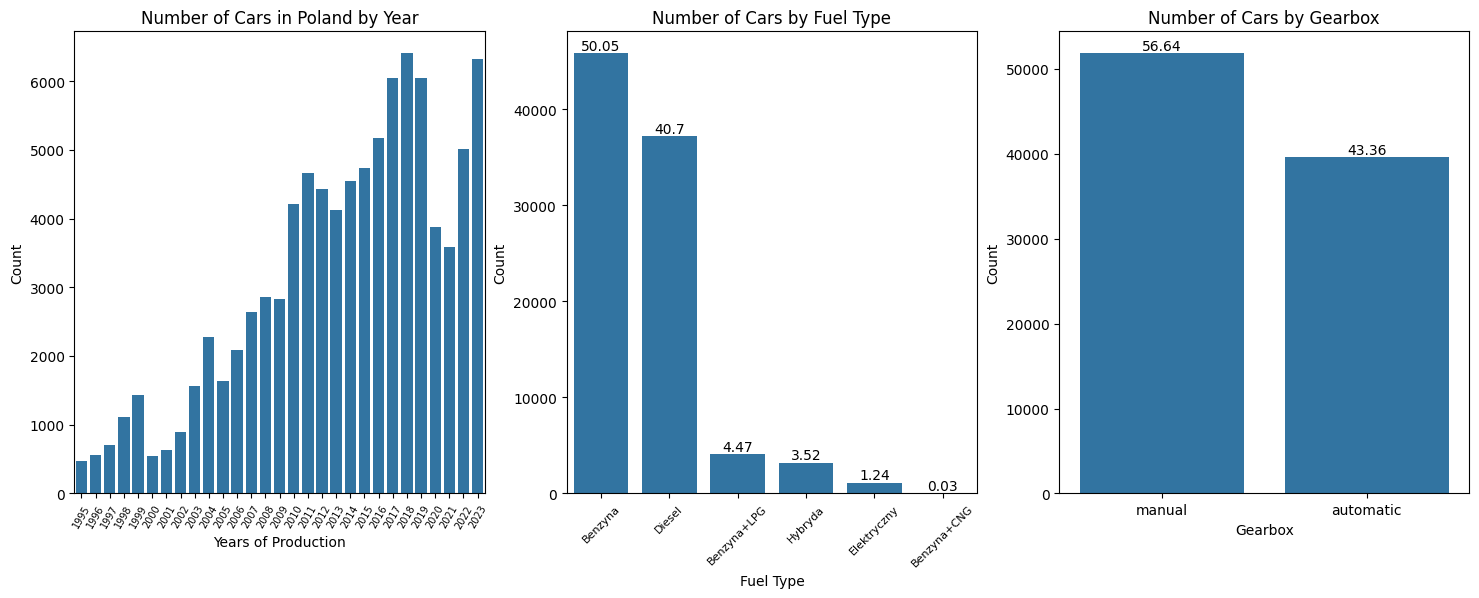

In [113]:
fig = plt.figure(figsize=(18,6))
ax1= plt.subplot(1,3,1)
ax1 = sns.countplot(uc_data_clean, x='year')
ax1.tick_params(axis='x', labelrotation=60, labelsize=7)
ax1.set_title('Number of Cars in Poland by Year')
ax1.set_xlabel('Years of Production')
ax1.set_ylabel('Count')

ax2 = plt.subplot(1,3,2)
ax2 = sns.countplot(data=uc_data_clean, x='fuel_type', order=list(uc_data_clean['fuel_type'].value_counts(normalize=True).index))
ax2.bar_label(ax2.containers[0], labels= list((uc_data_clean['fuel_type'].value_counts(normalize=True)*100).round(2)))
ax2.tick_params(axis='x', labelrotation = 45, labelsize=8)
ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('Count')
ax2.set_title('Number of Cars by Fuel Type')

ax3 = plt.subplot(1,3,3)
ax3 = sns.countplot(data=uc_data_clean, x='gearbox', order=list(uc_data_clean['gearbox'].value_counts(normalize=True).index))
ax3.bar_label(ax3.containers[0], labels= list((uc_data_clean['gearbox'].value_counts(normalize=True)*100).round(2)))
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Count')
ax3.set_title('Number of Cars by Gearbox')

After first look, we can see how cars, depending of age/fuel and gearbox type, represented at the market.
Manual gearbox are little more popular than automatic. Petrol and diesel engines are approximately at 90% of all cars, and most of the cars are produced after 2010.<br>
Now, we can look what is average price by year, fuel and gearbox type.

#### Grouped Statistics: Price by Year

The following code generates aggregated statistics for the `price_in_pln` column, grouped by the `year` of the cars:

```python
uc_data_clean.groupby('year')['price_in_pln'].agg(['count','mean','std','min','max'])


In [114]:
uc_data_clean.groupby('year')['price_in_pln'].agg(['count','mean','std','min','max'])

,count,mean,std,min,max
year,,,,,
1995,477,26104.486373,40850.205613,1500.0,389660.0
1996,562,24194.880783,31844.857506,1600.0,199000.0
1997,709,17410.720733,28275.066937,1500.0,189500.0
1998,1121,17849.846566,25154.668828,1300.0,285000.0
1999,1432,29167.474162,61177.934814,1300.0,449000.0
2000,550,18099.667273,29278.081010,1111.0,289911.0
2001,633,17781.769352,25541.750166,1800.0,229999.0
2002,893,17479.571109,24011.474392,1600.0,359000.0
2003,1565,17301.649840,21976.404947,1550.0,270000.0


#### Grouped Statistics: Price by Fuel Type

The following code generates aggregated statistics for the `price_in_pln` column, grouped by the `fuel_type` of the cars:

```python
uc_data_clean.groupby('fuel_type')['price_in_pln'].agg(['count','mean','std','min','max'])


In [115]:
uc_data_clean.groupby('fuel_type')['price_in_pln'].agg(['count','mean','std','min','max'])

,count,mean,std,min,max
fuel_type,,,,,
Benzyna,45807,86123.788875,117753.312624,1111.0,2599000.0
Benzyna+CNG,26,50967.961538,35151.331136,7500.0,159700.0
Benzyna+LPG,4092,31558.667400,33221.065545,1300.0,560000.0
Diesel,37248,78421.282324,100053.699357,1300.0,1699000.0
Elektryczny,1131,219411.789567,177678.443196,13000.0,1232156.0
Hybryda,3217,143055.892136,117403.344640,8900.0,2298999.0


#### Grouped Statistics: Price by Gearbox

The following code generates aggregated statistics for the `price_in_pln` column, grouped by the `gearbox` of the cars:

```python
uc_data_clean.groupby('gearbox')['price_in_pln'].agg(['count','mean','std','min','max'])


In [116]:
uc_data_clean.groupby('gearbox')['price_in_pln'].agg(['count','mean','std','min','max'])

,count,mean,std,min,max
gearbox,,,,,
automatic,39681,134687.622666,147327.298274,1600.0,2599000.0
manual,51842,45533.338586,43308.953059,1111.0,938520.0


#### Bar Plots: Mean Price by Year, Fuel Type, and Gearbox

The following code generates three bar plots to analyze the relationship between car prices and various features: production year, fuel type, and gearbox. These visualizations provide insights into how the price of used cars in Poland varies with each of these attributes.

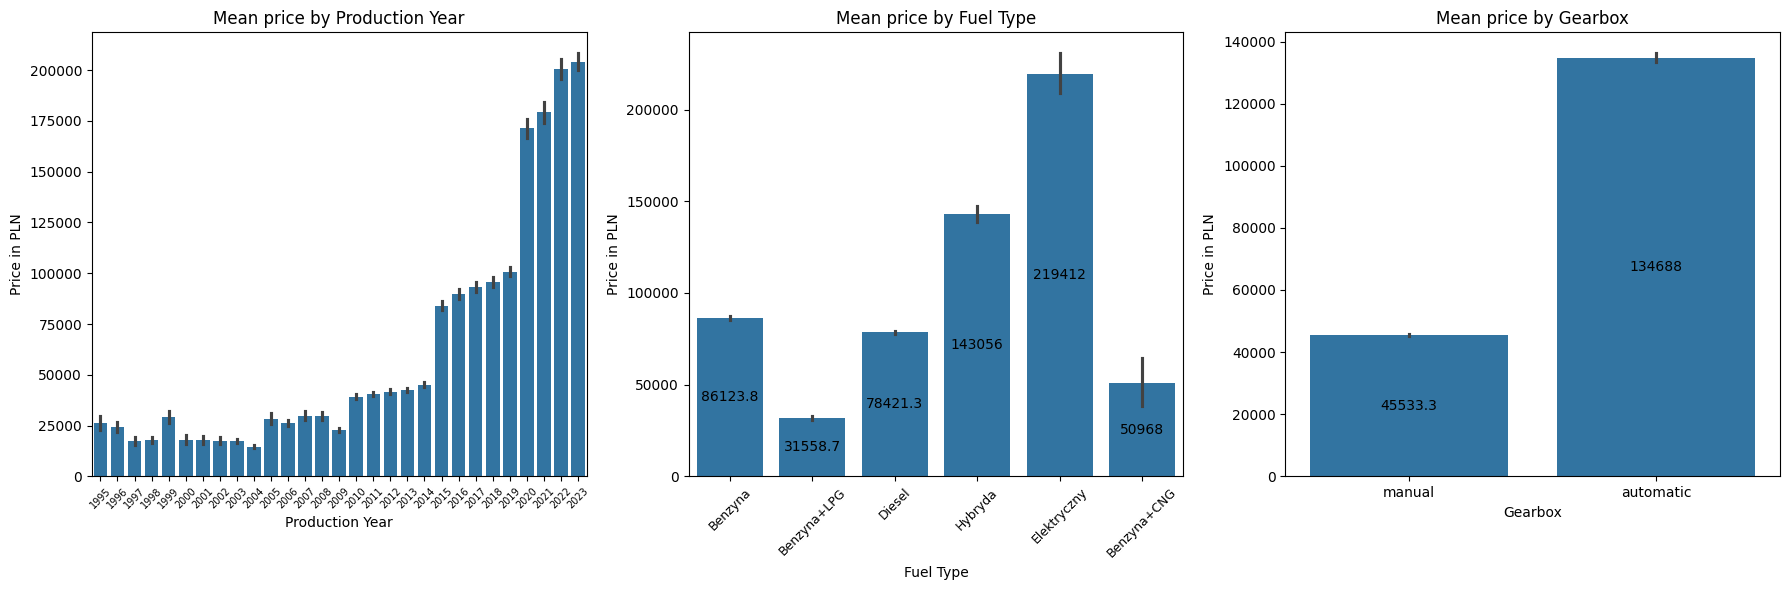

In [117]:
fig = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,3,1)
ax1 = sns.barplot(data=uc_data_clean, x='year', y='price_in_pln')
ax1.tick_params(axis='x', labelrotation = 45, labelsize=7)
ax1.set_title('Mean price by Production Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Price in PLN')

ax2 = plt.subplot(1,3,2)
ax2 = sns.barplot(data=uc_data_clean, x = 'fuel_type', y='price_in_pln')
ax2.bar_label(ax2.containers[0], label_type='center')
ax2.tick_params(axis='x', labelrotation=45, labelsize=9)
ax2.set_title('Mean price by Fuel Type')
ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('Price in PLN')

ax3 = plt.subplot(1,3,3)
ax3 = sns.barplot(data=uc_data_clean, x='gearbox', y='price_in_pln')
ax3.bar_label(ax3.containers[0], label_type='center')
ax3.set_title('Mean price by Gearbox')
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Price in PLN')
plt.tight_layout()

#### Box Plots: Price Distribution by Year, Fuel Type, and Gearbox

The following code generates three box plots to analyze the distribution of car prices in relation to the production year, fuel type, and gearbox type. Box plots are useful for understanding the spread and potential outliers in the data.


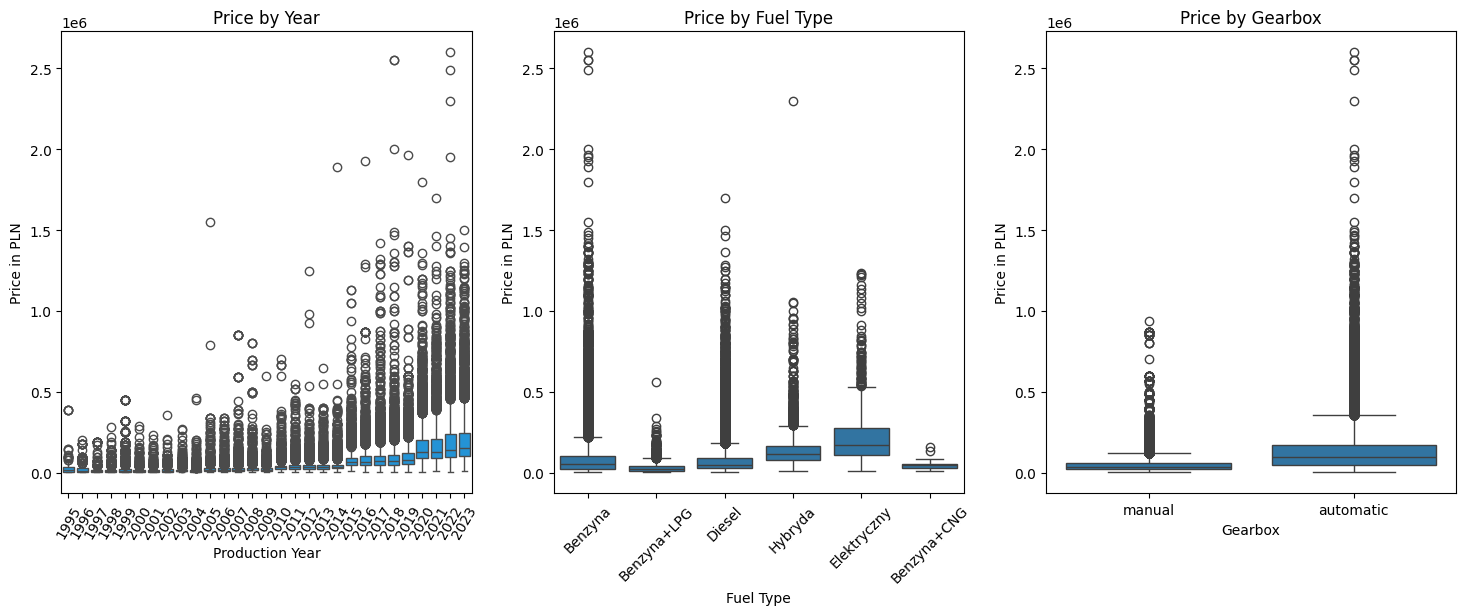

In [118]:
fig = plt.figure(figsize = (18,6))
ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data = uc_data_clean ,x = 'year', y = 'price_in_pln', color = '#069AF3');
ax1.tick_params(axis = 'x', labelrotation=60)
ax1.set_title('Price by Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Price in PLN')

ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data = uc_data_clean, x = 'fuel_type', y = 'price_in_pln')
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.set_title('Price by Fuel Type')
ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('Price in PLN')

ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data = uc_data_clean, x = 'gearbox', y = 'price_in_pln')
ax3.set_title('Price by Gearbox')
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Price in PLN');

Drawned boxplots shows a lot of outliers at price data. This outliers is result of luxury car segment. Let's see car price distribution at first

In [119]:
#price percentile
uc_data_clean.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[['price_in_pln']].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
price_in_pln,91523.0,84187.350655,111467.460138,1111.0,3500.0,7900.0,12000.0,19999.0,49900.0,119890.2,182900.0,269986.6,559900.0,2599000.0


Text(0.5, 1.0, 'Price distribution')

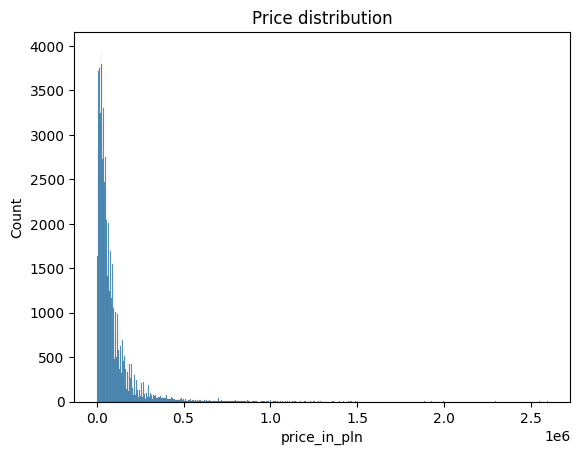

In [120]:
sns.histplot(uc_data_clean['price_in_pln']).set_title('Price distribution')

Looks like most values is less than 500000 PLN. Let's double check the data and then make price segmentation.

Text(0.5, 1.0, 'Price distribution of cars with price less than 500k')

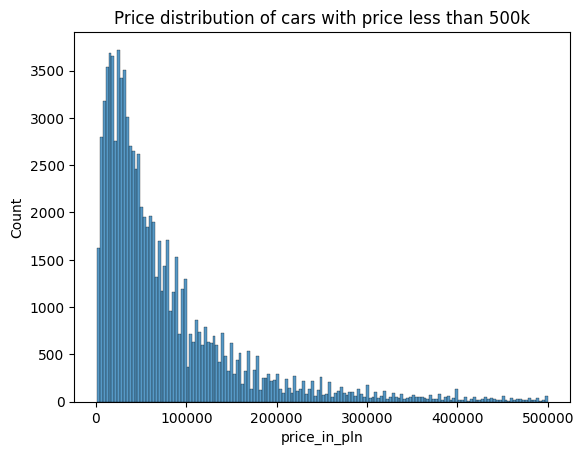

In [121]:
sns.histplot(uc_data_clean[uc_data_clean['price_in_pln']<500000], x='price_in_pln').set_title('Price distribution of cars with price less than 500k')

Let's check also for New and Used cars, probably hight price is assosiated with New Cars when we are interested only in Used Cars. We can do it checking the Mileage and Production year. 

In [122]:
uc_data_clean.groupby('brand')['mileage'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
brand,,,,
alfa-romeo,178582.214724,78486.178022,1.0,380554.0
aston-martin,40871.578947,23467.842103,112.0,84479.0
audi,183384.904669,116197.208145,1.0,470000.0
bentley,72928.410526,42275.584656,12000.0,170000.0
bmw,109050.742510,94288.110567,1.0,475000.0
cadillac,161057.666667,109652.376409,10.0,376000.0
chevrolet,122333.908571,94582.754269,1.0,420000.0
citroen,145909.437888,106813.096182,1.0,480000.0
dacia,88298.952500,78109.451225,1.0,388199.0


In [123]:
uc_data_clean.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[['mileage']].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
mileage,91189.0,140909.495608,96658.185158,1.0,1.0,5.0,6618.8,43173.4,141504.0,221690.0,263300.0,300000.0,385000.0,900000.0


Text(0.5, 1.0, 'Used Cars mileage distribution')

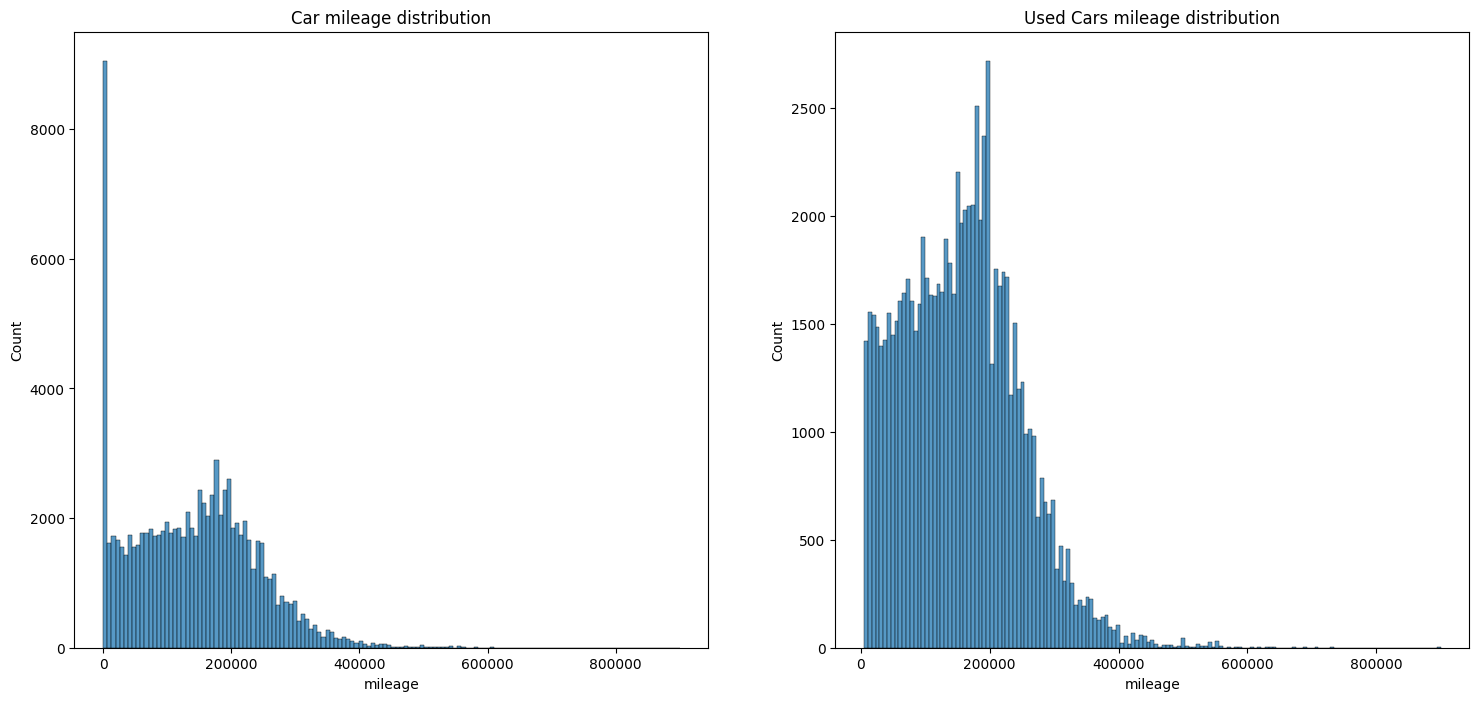

In [124]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,2,1)
ax1 = sns.histplot(uc_data_clean, x='mileage')
ax1.set_title('Car mileage distribution')

ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(uc_data_clean[uc_data_clean['mileage']>5000], x='mileage')
ax2.set_title('Used Cars mileage distribution')

Distribution plot shows that a lot of cars can be categorized as new.

<Axes: xlabel='mileage', ylabel='Count'>

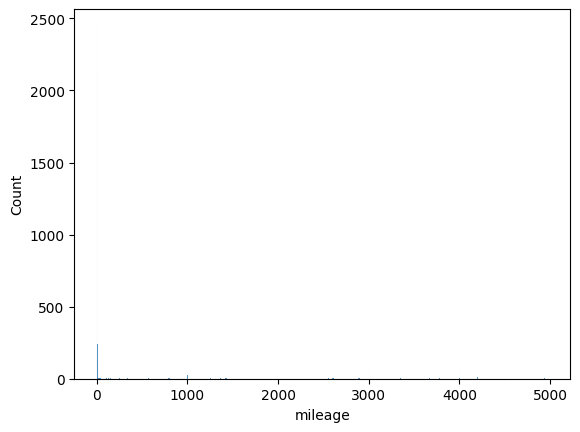

In [125]:
sns.histplot(uc_data_clean[uc_data_clean['mileage']<5000], x='mileage')

In [126]:
#cars with low mileage
uc_data_clean[uc_data_clean['mileage'] < 5000].groupby('year').agg({'brand':'count'})

,brand
year,
1995,6
1996,2
2009,2
2011,6
2015,4
2016,2
2017,4
2018,14
2019,26


#### Splitting the Dataset into Luxury and Common Cars, and Categorizing New and Used Cars

We are now going to split the dataset into two categories: luxury cars and common cars. We will then create a new column to categorize each car as either "New" or "Used."

- **Luxury Cars**: These are cars with a price higher than 200,000 PLN.
- **Common Cars**: These are cars with a price lower than 200,000 PLN.
- **New vs Used Cars**: We define a car as "New" if it has a mileage less than 5,000 km and is produced in 2021 or later. All other cars are categorized as "Used."

Below is the Python code to perform these operations:

In [ ]:
# Splitting the dataset into common and luxury cars based on price
common_cars = uc_data_clean[uc_data_clean['price_in_pln']<200000].copy()
luxury_cars = uc_data_clean[uc_data_clean['price_in_pln']>200000].copy()

In [ ]:
# Adding a new column 'car_market' to categorize cars as New or Used
uc_data_clean['car_market'] = np.where((uc_data_clean['mileage']<5000)&(uc_data_clean['year']>2021),'New', 'Used')
# Doing the same for the common and luxury cars datasets
common_cars['car_market'] = np.where((common_cars['mileage']<5000)&(common_cars['year']>2021),'New', 'Used')
luxury_cars['car_market'] = np.where((luxury_cars['mileage']<5000)&(luxury_cars['year']>2021),'New', 'Used')

In [129]:
uc_data_clean.groupby('car_market')['price_in_pln'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
car_market,,,,,,
New,8261,197788.111609,144700.0,162699.787101,9900.0,1950000.0
Used,83262,72916.231943,44900.0,98103.056812,1111.0,2599000.0


In [130]:
uc_data_clean['car_market'].value_counts(normalize=True)

car_market
Used    0.909739
New     0.090261
Name: proportion, dtype: float64

In [131]:
common_cars.groupby('car_market')['price_in_pln'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
car_market,,,,,,
New,5659,117324.922778,115900.0,40589.043188,9900.0,199999.0
Used,78202,54264.367254,40900.0,43575.933259,1111.0,199999.0


In [132]:
common_cars['car_market'].value_counts(normalize=True)

car_market
Used    0.932519
New     0.067481
Name: proportion, dtype: float64

In [133]:
luxury_cars.groupby('car_market')['price_in_pln'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
car_market,,,,,,
New,2599,372984.167757,306800.0,189118.798116,200006.0,1950000.0
Used,5038,361883.536324,294317.0,201534.548004,200010.0,2599000.0


In [134]:
luxury_cars['car_market'].value_counts(normalize=True)

car_market
Used    0.659683
New     0.340317
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Used Cars price distribution')

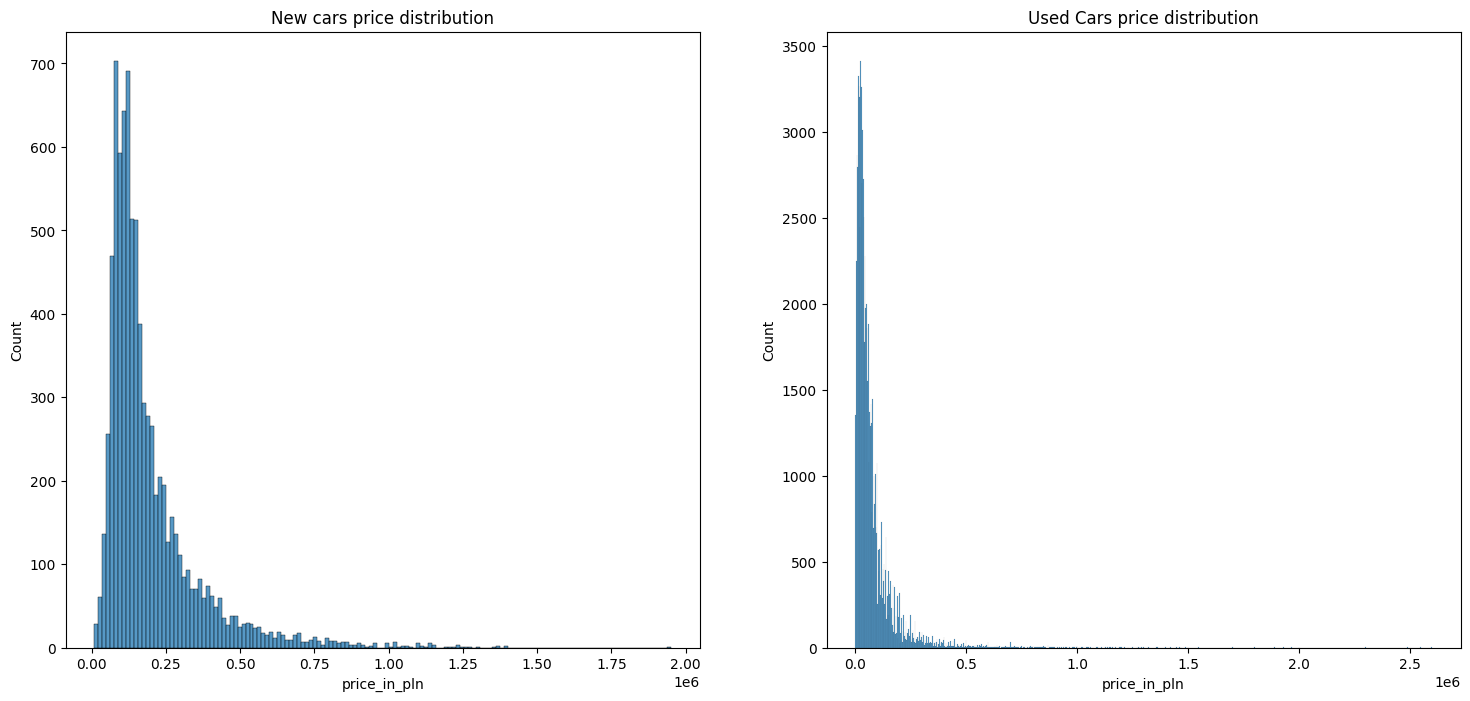

In [135]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,2,1)
ax1 = sns.histplot(uc_data_clean[uc_data_clean['car_market']=='New'], x='price_in_pln' )
ax1.set_title('New cars price distribution')
ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(uc_data_clean[uc_data_clean['car_market']=='Used'], x='price_in_pln')
ax2.set_title('Used Cars price distribution')

### Box Plots for New Common Cars' Price Analysis

The following box plots help analyze the distribution of prices for "New" common cars in our dataset. The data is segmented by three key factors: **production year**, **fuel type**, and **gearbox type**. These visualizations provide insights into how each of these variables influences the price of new cars in the "common" category.

- **Price by Production Year**: We examine how the price of new common cars changes by production year. This plot helps us understand whether newer models are significantly more expensive than older ones.
- **Price by Fuel Type**: This box plot analyzes the price distribution based on the car's fuel type. We can observe whether cars with certain fuel types (e.g., diesel, petrol, hybrid) are generally priced higher or lower.
- **Price by Gearbox Type**: The final plot investigates the price distribution by gearbox type (manual vs. automatic). This can reveal whether manual or automatic cars in the common category tend to be more expensive.

Here’s the Python code used to generate the plots:

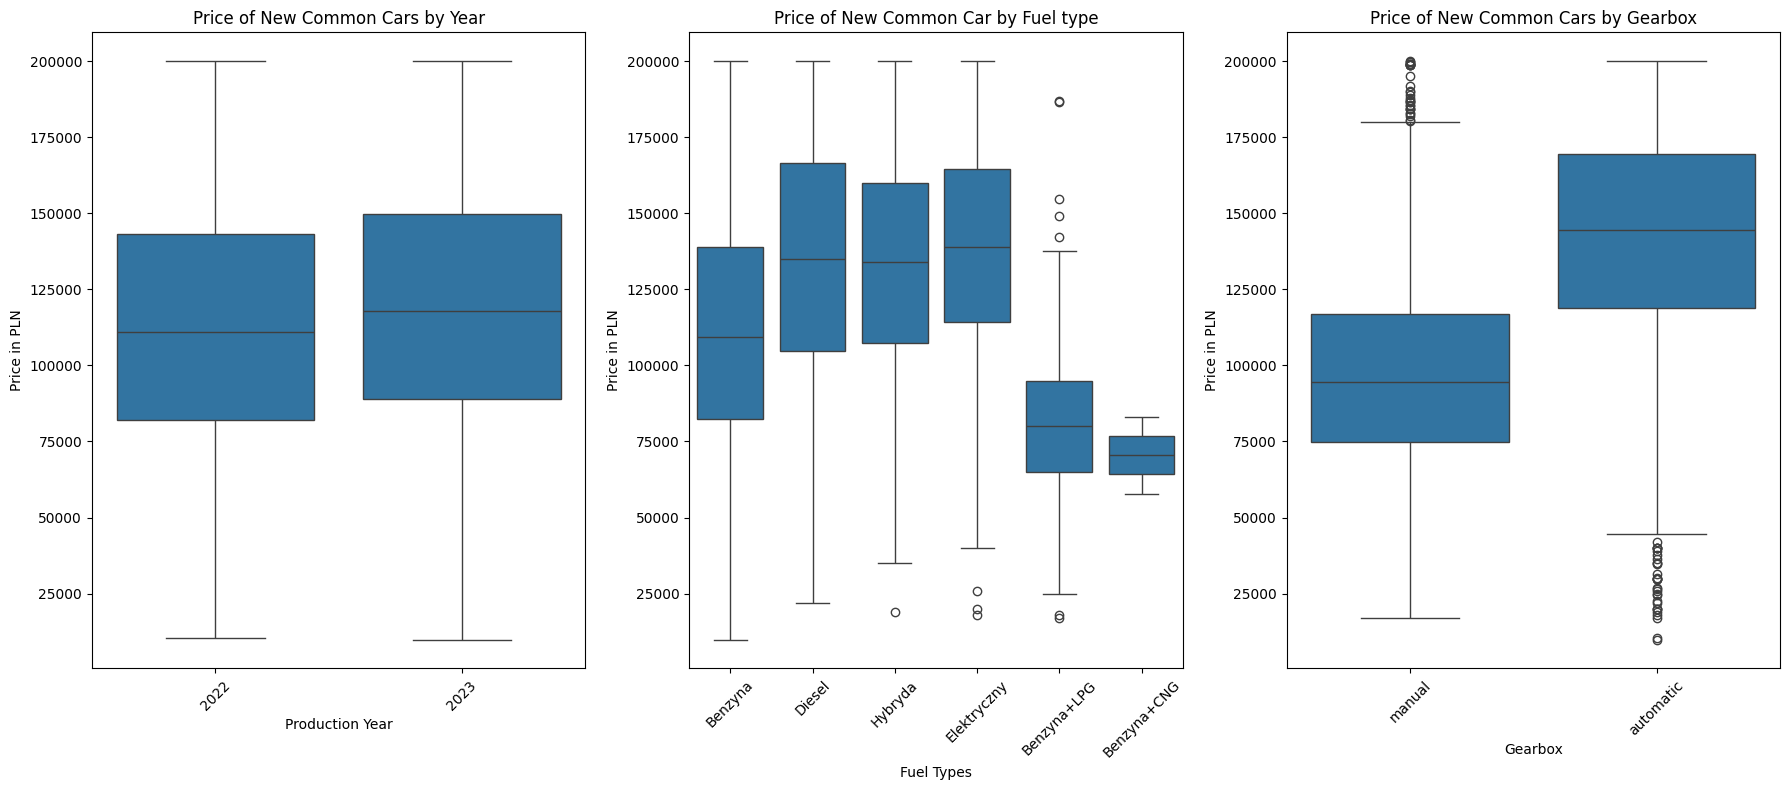

In [136]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data=common_cars[common_cars['car_market']=='New'], x='year', y='price_in_pln')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Price of New Common Cars by Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Price in PLN')
ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data=common_cars[common_cars['car_market']=='New'], x='fuel_type', y='price_in_pln')
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Price of New Common Car by Fuel type')
ax2.set_xlabel('Fuel Types')
ax2.set_ylabel('Price in PLN')
ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data=common_cars[common_cars['car_market']=='New'], x='gearbox', y='price_in_pln')
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Price of New Common Cars by Gearbox')
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Price in PLN')
plt.tight_layout()


### Box Plots for New Luxury Cars' Price Analysis

The following box plots help analyze the distribution of prices for "New" luxury cars in our dataset. Similar to the common cars' analysis, we look at how the prices of new luxury cars are affected by three key factors: **production year**, **fuel type**, and **gearbox type**. These visualizations provide insights into the premium car market in Poland.

- **Price by Production Year**: This plot shows how the price of new luxury cars varies with production year. We can observe if newer models of luxury cars tend to have significantly higher prices compared to older ones.
- **Price by Fuel Type**: This box plot visualizes the price distribution for luxury cars by fuel type (e.g., petrol, diesel, electric). It helps to understand whether certain fuel types correlate with higher prices for luxury vehicles.
- **Price by Gearbox Type**: The final plot examines how the gearbox type (manual vs. automatic) influences the price of new luxury cars. We can see if automatic transmissions tend to be more expensive for luxury models.

Here’s the Python code used to generate the plots:

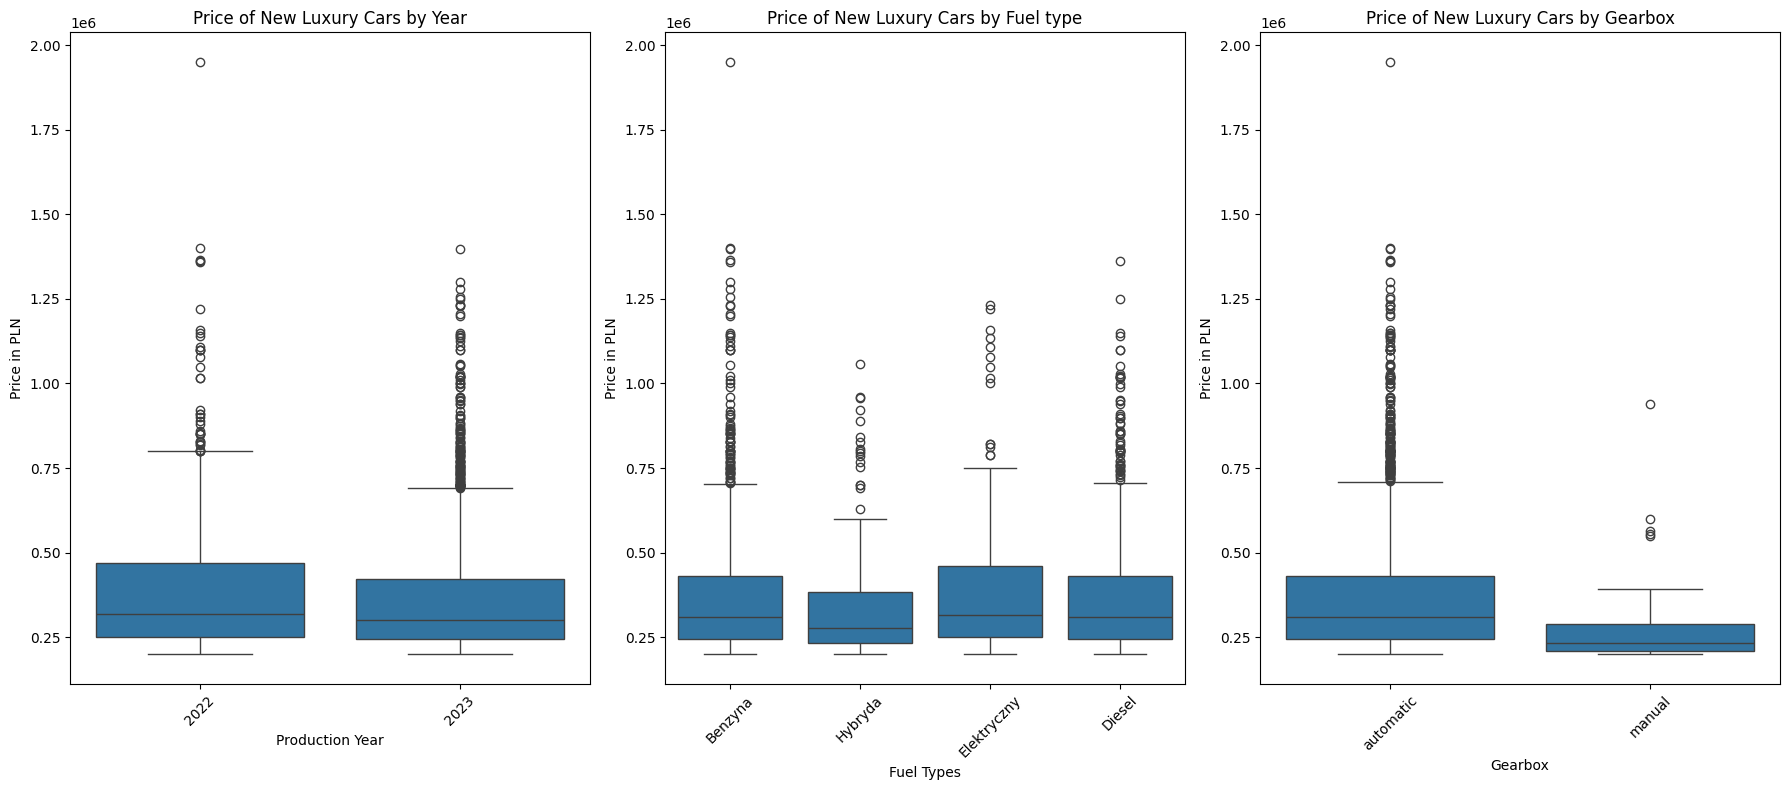

In [137]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data=luxury_cars[luxury_cars['car_market']=='New'], x='year', y='price_in_pln')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Price of New Luxury Cars by Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Price in PLN')

ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data=luxury_cars[luxury_cars['car_market']=='New'], x='fuel_type', y='price_in_pln')
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Price of New Luxury Cars by Fuel type')
ax2.set_xlabel('Fuel Types')
ax2.set_ylabel('Price in PLN')

ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data=luxury_cars[luxury_cars['car_market']=='New'], x='gearbox', y='price_in_pln')
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Price of New Luxury Cars by Gearbox')
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Price in PLN')

plt.tight_layout()

### Box Plots for Used Common Cars' Price Analysis

The following box plots help analyze the distribution of prices for "Used" common cars in our dataset. This set of visualizations examines how the prices of used common cars are influenced by three key factors: **production year**, **fuel type**, and **gearbox type**. These plots provide insights into the general used car market in Poland.

- **Price by Production Year**: This box plot shows how the price of used common cars varies with production year. We can observe trends in pricing, identifying whether older cars tend to be cheaper or if other factors (such as model and mileage) play a bigger role in price determination.
  
- **Price by Fuel Type**: This plot displays the price distribution for used common cars, segmented by fuel type (e.g., petrol, diesel, hybrid). It helps us understand if certain fuel types have higher prices for used cars, which could be influenced by factors like fuel economy or car popularity.

- **Price by Gearbox Type**: The final plot visualizes the price distribution by gearbox type (manual vs. automatic) for used common cars. We can observe if automatic gearboxes tend to increase the price of used cars, a common trend in the market.

Here’s the Python code used to generate the plots:

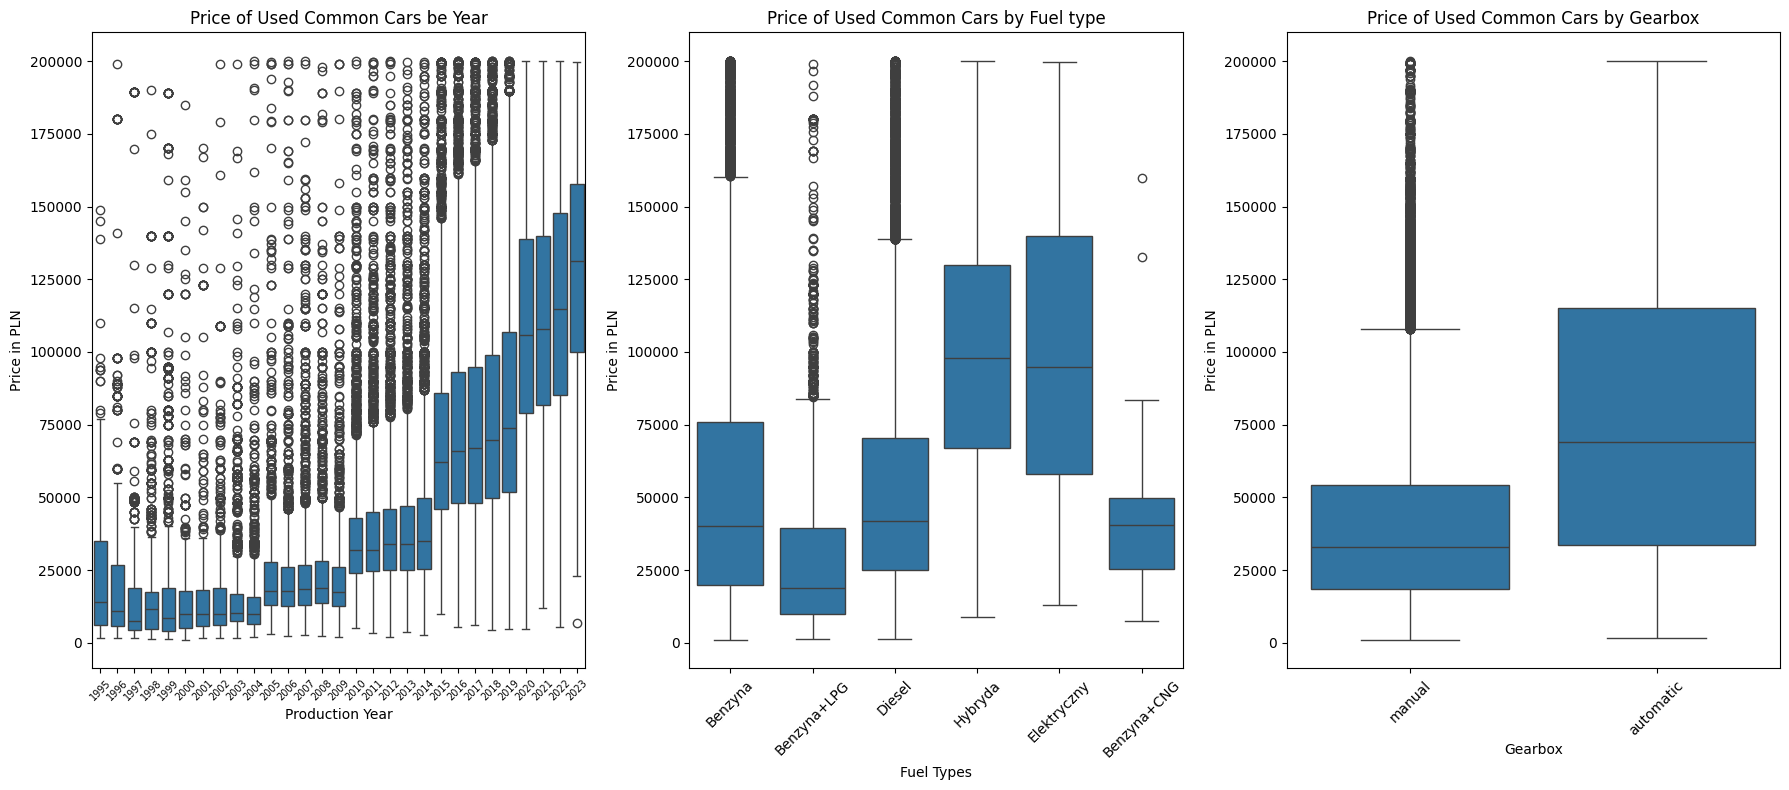

In [138]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data=common_cars[common_cars['car_market']=='Used'], x='year', y='price_in_pln')
ax1.tick_params(axis='x', labelrotation=45,labelsize=7)
ax1.set_title('Price of Used Common Cars be Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Price in PLN')

ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data=common_cars[common_cars['car_market']=='Used'], x='fuel_type', y='price_in_pln')
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Price of Used Common Cars by Fuel type')
ax2.set_xlabel('Fuel Types')
ax2.set_ylabel('Price in PLN')

ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data=common_cars[common_cars['car_market']=='Used'], x='gearbox', y='price_in_pln')
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Price of Used Common Cars by Gearbox')
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Price in PLN')

plt.tight_layout()

Car prices changes mostly by age, as expected. Also can be notice, common cars with electric and diesel engines in average slightly expensive.

### Box Plots for Used Luxury Cars' Price Analysis

The following box plots help analyze the distribution of prices for **Used Luxury Cars** in our dataset. These visualizations examine how the prices of used luxury cars are influenced by three key factors: **production year**, **fuel type**, and **gearbox type**. By understanding these trends, we can gain valuable insights into the luxury used car market in Poland.

- **Price by Production Year**: This box plot shows how the price of used luxury cars varies with the production year. We can observe if newer luxury cars tend to have a higher price or if there are price fluctuations across different years. This trend may reflect the market's preference for newer models or unique features found in specific years.

- **Price by Fuel Type**: This plot displays the price distribution for used luxury cars, segmented by fuel type (e.g., petrol, diesel, hybrid). It helps us understand whether certain fuel types command higher prices in the luxury car segment, which could be due to factors such as performance or sustainability.

- **Price by Gearbox Type**: The final plot visualizes the price distribution by gearbox type (manual vs. automatic) for used luxury cars. As with common cars, gearbox type can influence the price, but in luxury cars, automatic gearboxes may have a stronger correlation with higher prices due to the added comfort and technology.

Here’s the Python code used to generate the plots:

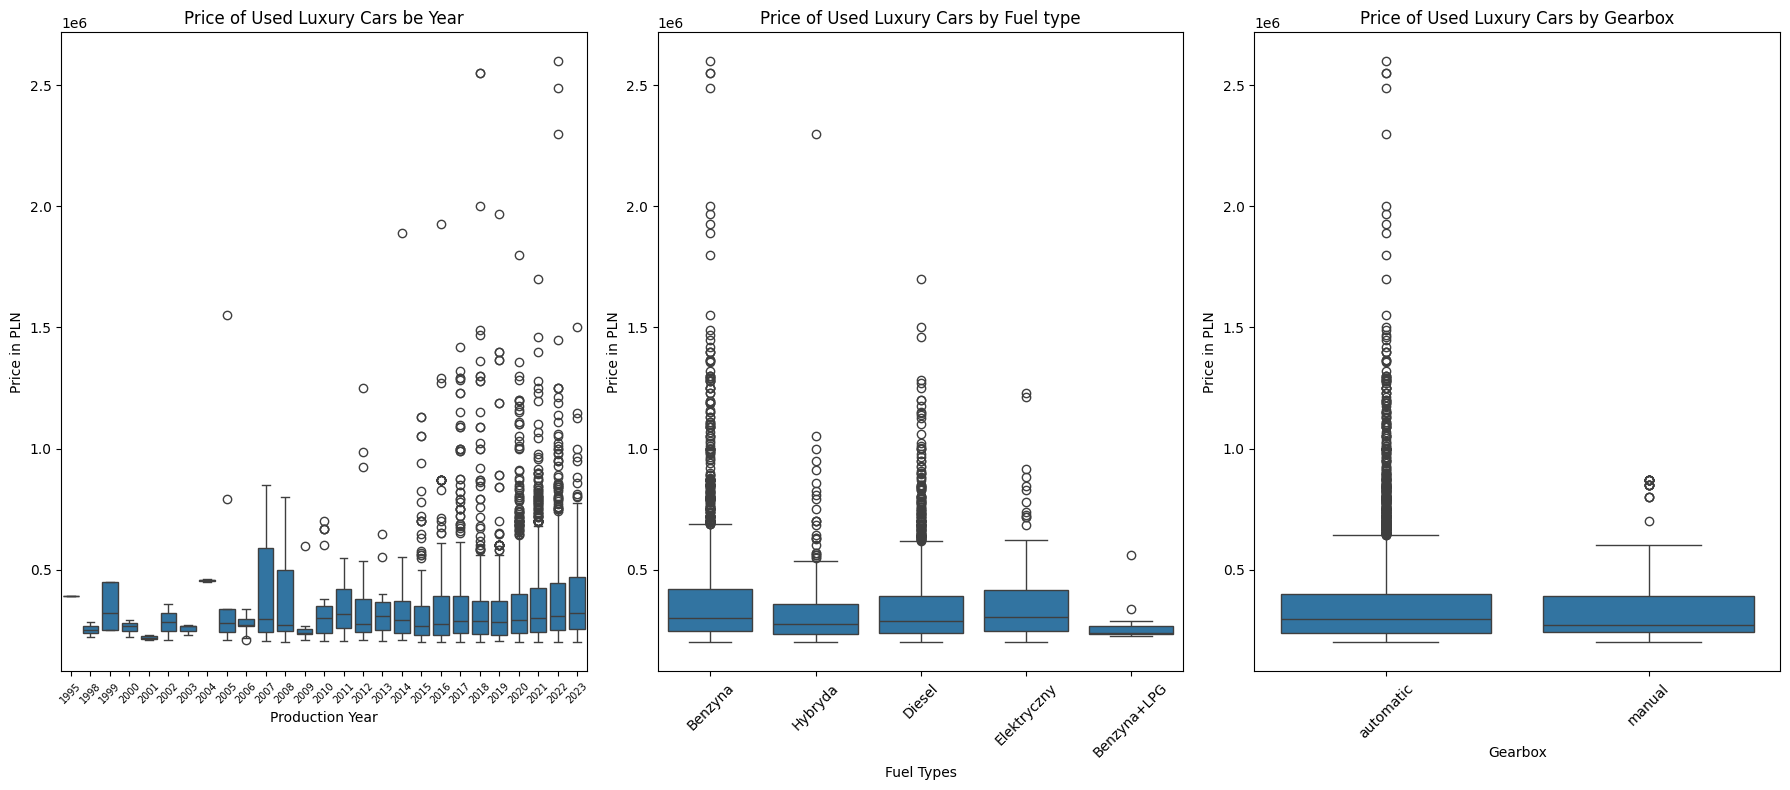

In [139]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data=luxury_cars[luxury_cars['car_market']=='Used'], x='year', y='price_in_pln')
ax1.tick_params(axis='x', labelrotation=45,labelsize=7)
ax1.set_title('Price of Used Luxury Cars be Year')
ax1.set_xlabel('Production Year')
ax1.set_ylabel('Price in PLN')

ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data=luxury_cars[luxury_cars['car_market']=='Used'], x='fuel_type', y='price_in_pln')
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Price of Used Luxury Cars by Fuel type')
ax2.set_xlabel('Fuel Types')
ax2.set_ylabel('Price in PLN')

ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data=luxury_cars[luxury_cars['car_market']=='Used'], x='gearbox', y='price_in_pln')
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Price of Used Luxury Cars by Gearbox')
ax3.set_xlabel('Gearbox')
ax3.set_ylabel('Price in PLN')

plt.tight_layout()

### Brand Price Analysis for Used Cars

In this step, we analyze the prices of used cars for different brands. We grouped the dataset by the `brand` column and filtered for "Used" cars only. The goal is to understand the pricing patterns of different car brands in the used car market.

The following statistics were calculated for each brand:

- **Count**: The number of used cars available for each brand.
- **Mean**: The average price of used cars for each brand.
- **Standard Deviation (Std)**: The variation in prices for cars of that brand.
- **Min**: The lowest price for a used car of each brand.
- **Max**: The highest price for a used car of each brand.

We sorted the results by the **mean price** in descending order to identify the most expensive brands.

In [140]:
brand_grouped = common_cars[common_cars['car_market']=='Used'].groupby('brand')['price_in_pln'].agg(['count','mean','std','min','max']).sort_values('mean', ascending = False)
brand_grouped

,count,mean,std,min,max
brand,,,,,
bentley,11,151557.363636,55533.230978,60000.0,199999.0
maserati,82,130370.841463,47531.194818,30750.0,199900.0
aston-martin,2,106000.000000,32526.911935,83000.0,129000.0
porsche,339,105082.737463,50803.243258,16800.0,199000.0
bmw,5171,99173.909882,48001.014631,3700.0,199999.0
land-rover,592,93723.415541,53569.597884,6900.0,199900.0
mercedes-benz,4736,90532.924198,54729.556455,1500.0,199999.0
jeep,643,71092.517885,41053.001855,7500.0,199900.0
isuzu,148,70543.614865,40359.977547,18600.0,190000.0


This grouped summary provides useful insights into how different car brands are priced in the used car market, including:

The most expensive brands on average (based on mean price).
The price variability within each brand (using std).
The price range (using min and max).

### Common Used Cars Price and Count by Brand

In this step, we are visualizing two important aspects of used common cars by brand: the **mean price** and the **number of available cars** for each brand.

1. **Mean Price of Used Cars by Brand**: 
   The first plot displays the average price of used cars for each brand. The brands are ordered based on their mean price, which helps to identify which brands tend to have higher or lower prices in the used car market.

2. **Number of Used Cars by Brand**: 
   The second plot shows the number of available used cars for each brand. This helps us understand which brands are more prevalent in the market and which have higher volumes.

The following code creates both visualizations:

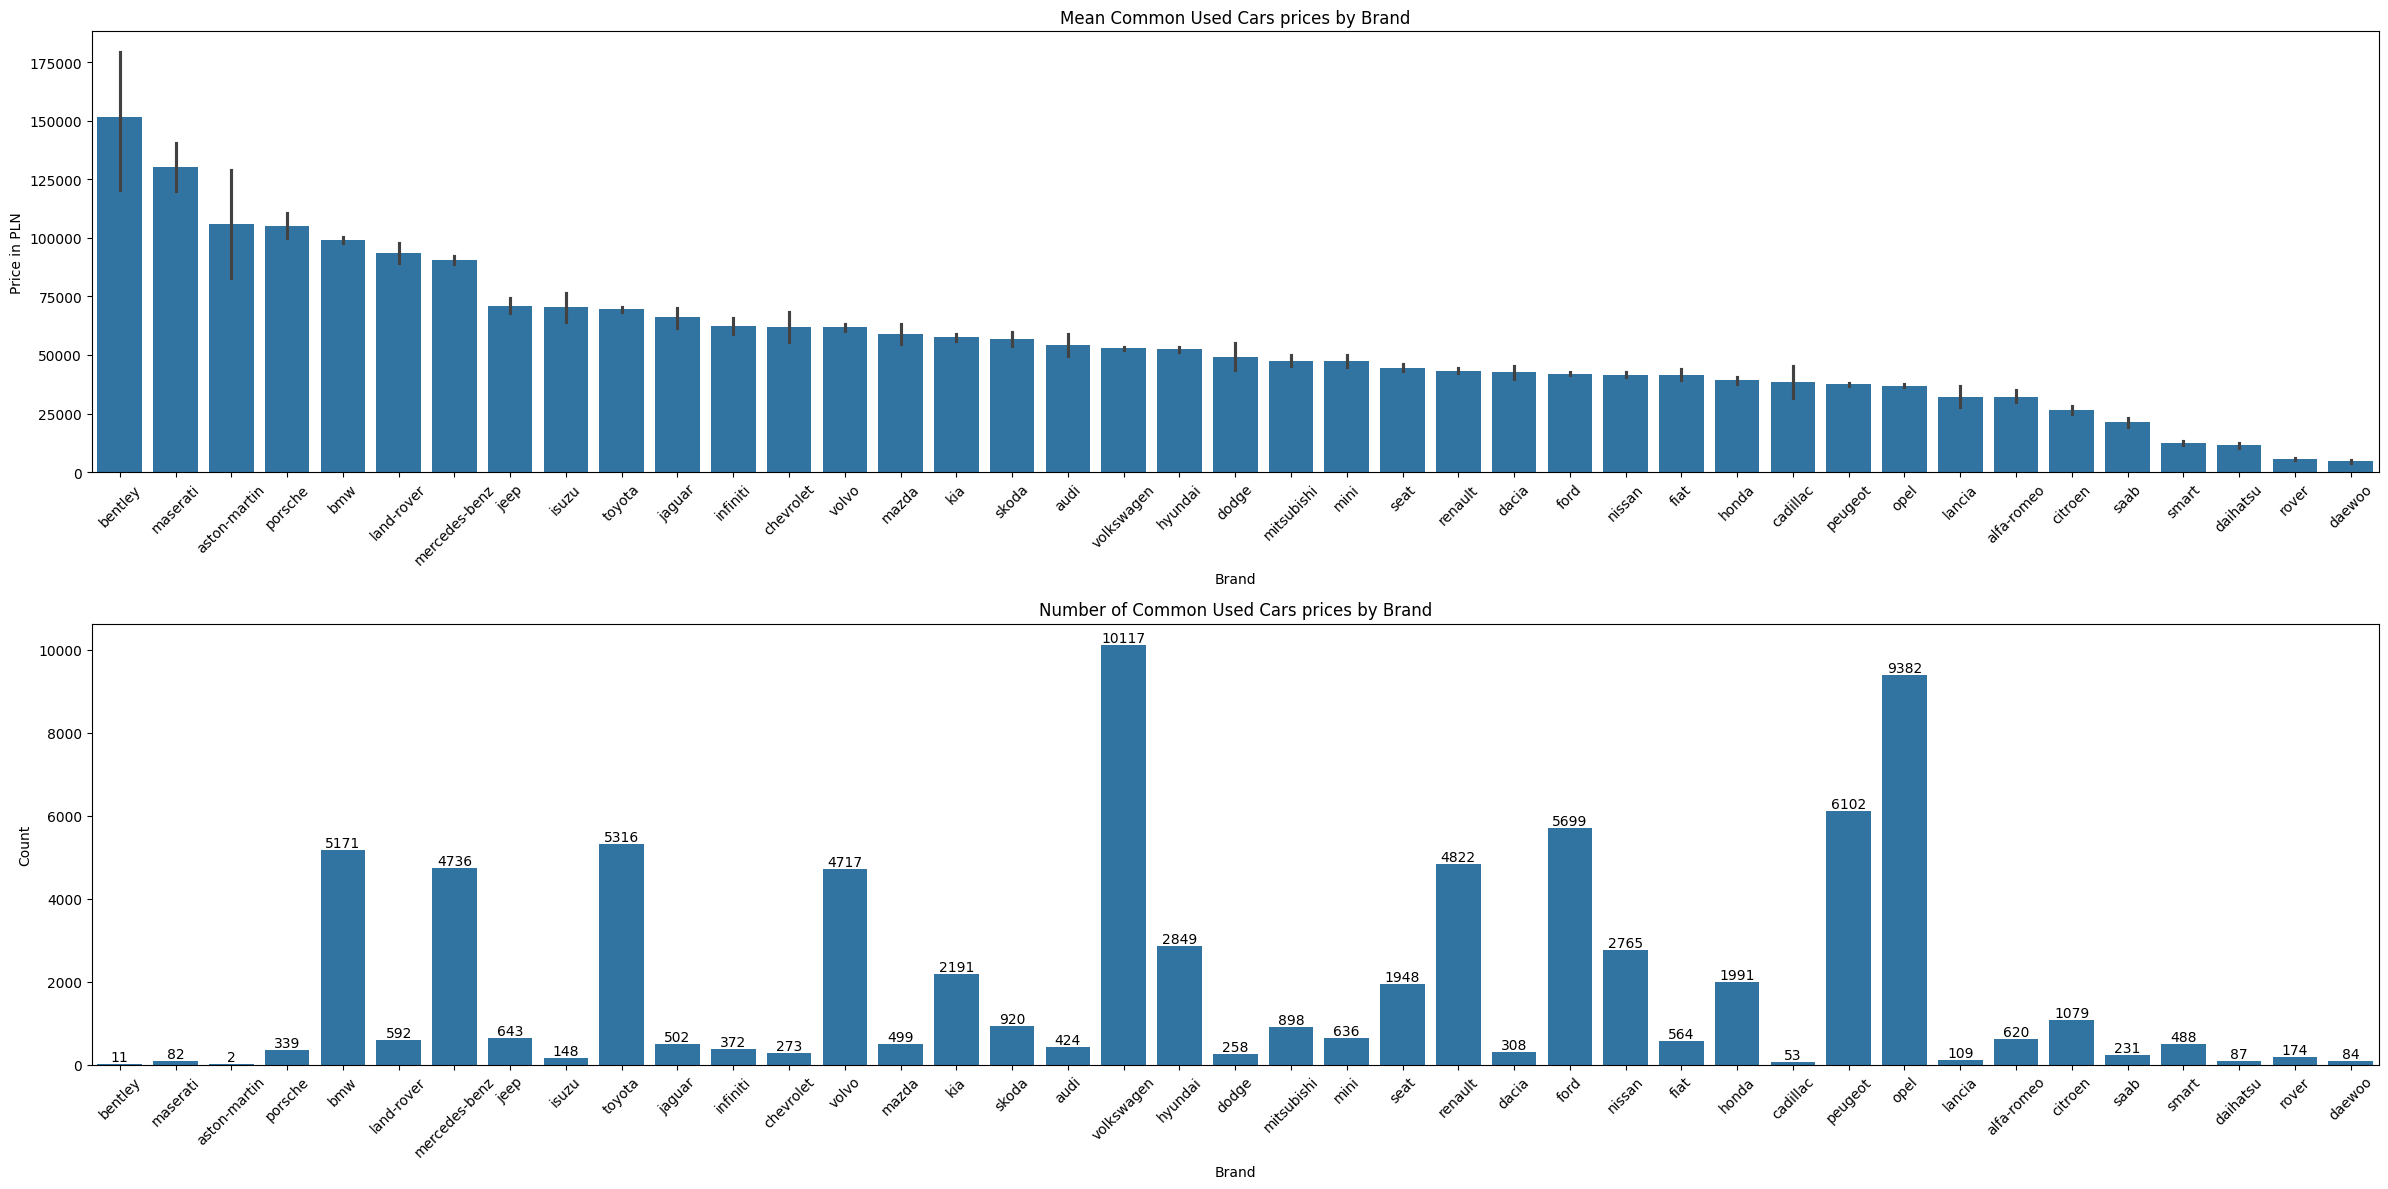

In [141]:
fig = plt.figure(figsize=(24,12))
ax1 = plt.subplot(2,1,1)
ax1 = sns.barplot(data=common_cars[common_cars['car_market']=='Used'], x = 'brand', y = 'price_in_pln', order = list(brand_grouped.index))
ax1.tick_params(axis = 'x', labelrotation=45, labelsize = 10)
ax1.set_title('Mean Common Used Cars prices by Brand')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Price in PLN')

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(data=brand_grouped, x = brand_grouped.index, y = 'count', order = list(brand_grouped.index))
ax2.tick_params(axis = 'x', labelrotation=45, labelsize = 10)
ax2.set_title('Number of Common Used Cars prices by Brand')
ax2.set_xlabel('Brand')
ax2.set_ylabel('Count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

This plots shows, that Volkswagen and Opel are most common cars in Common Used Cars Market in Poland. We can also check the Price distribution of this cars depending of the Production year. 

In [142]:
volks_used = (
    common_cars[(common_cars['car_market'] == 'Used') & (common_cars['brand'] == 'volkswagen')]
    .groupby('year')['price_in_pln']
    .agg(['count', 'mean', 'std', 'min', 'max'])
    .sort_values('year', ascending=False)
)
volks_used

,count,mean,std,min,max
year,,,,,
2023,99,138428.585859,35008.612339,22900.0,199900.0
2022,138,135991.710145,36078.825605,36900.0,199990.0
2021,184,127063.983696,36431.089195,35999.0,199900.0
2020,302,125119.748344,37579.029473,22500.0,199900.0
2019,914,82560.939825,32466.865044,14900.0,199900.0
2018,889,79821.322835,31460.750807,9900.0,199000.0
2017,724,76561.240331,30940.301004,15900.0,199900.0
2016,521,81371.349328,32619.433972,11300.0,199900.0
2015,554,74660.566787,29599.329108,14500.0,179888.0


In [143]:
opel_used = (
    common_cars[(common_cars['car_market'] == 'Used') & (common_cars['brand'] == 'opel')]
    .groupby('year')['price_in_pln']
    .agg(['count', 'mean', 'std', 'min', 'max'])
    .sort_values('year', ascending=False)
)
opel_used

,count,mean,std,min,max
year,,,,,
2023,11,82044.454545,19799.293833,61900.0,116300.0
2022,106,101858.943396,35775.637563,33825.0,192900.0
2021,251,97304.099602,34895.413427,14300.0,199900.0
2020,295,93574.762712,35532.894611,18900.0,199900.0
2019,524,56320.530534,19909.666438,4750.0,184500.0
2018,649,55863.480740,19504.766635,9900.0,154500.0
2017,674,53996.197329,18115.847334,14900.0,136530.0
2016,545,52097.559633,18115.482857,5900.0,129900.0
2015,476,52413.846639,17601.257086,11500.0,137760.0


### Mean Used Car Prices for Specific Brands: Volkswagen and Opel

In this analysis, we focus on the **mean prices** of used common cars for two specific brands: **Volkswagen** and **Opel**. The code generates two bar plots that show the average price of used cars for each brand across different years. This analysis helps us understand the price trend over time for these two popular car brands.

1. **Volkswagen Used Cars Price Trend**: 
   The first plot displays the mean price of used Volkswagen cars for each year. This can help identify whether the price of used Volkswagens tends to increase, decrease, or remain stable over time.

2. **Opel Used Cars Price Trend**: 
   The second plot shows the mean price of used Opel cars for each year, providing a similar price trend analysis as the Volkswagen plot.

The following code generates the visualizations:

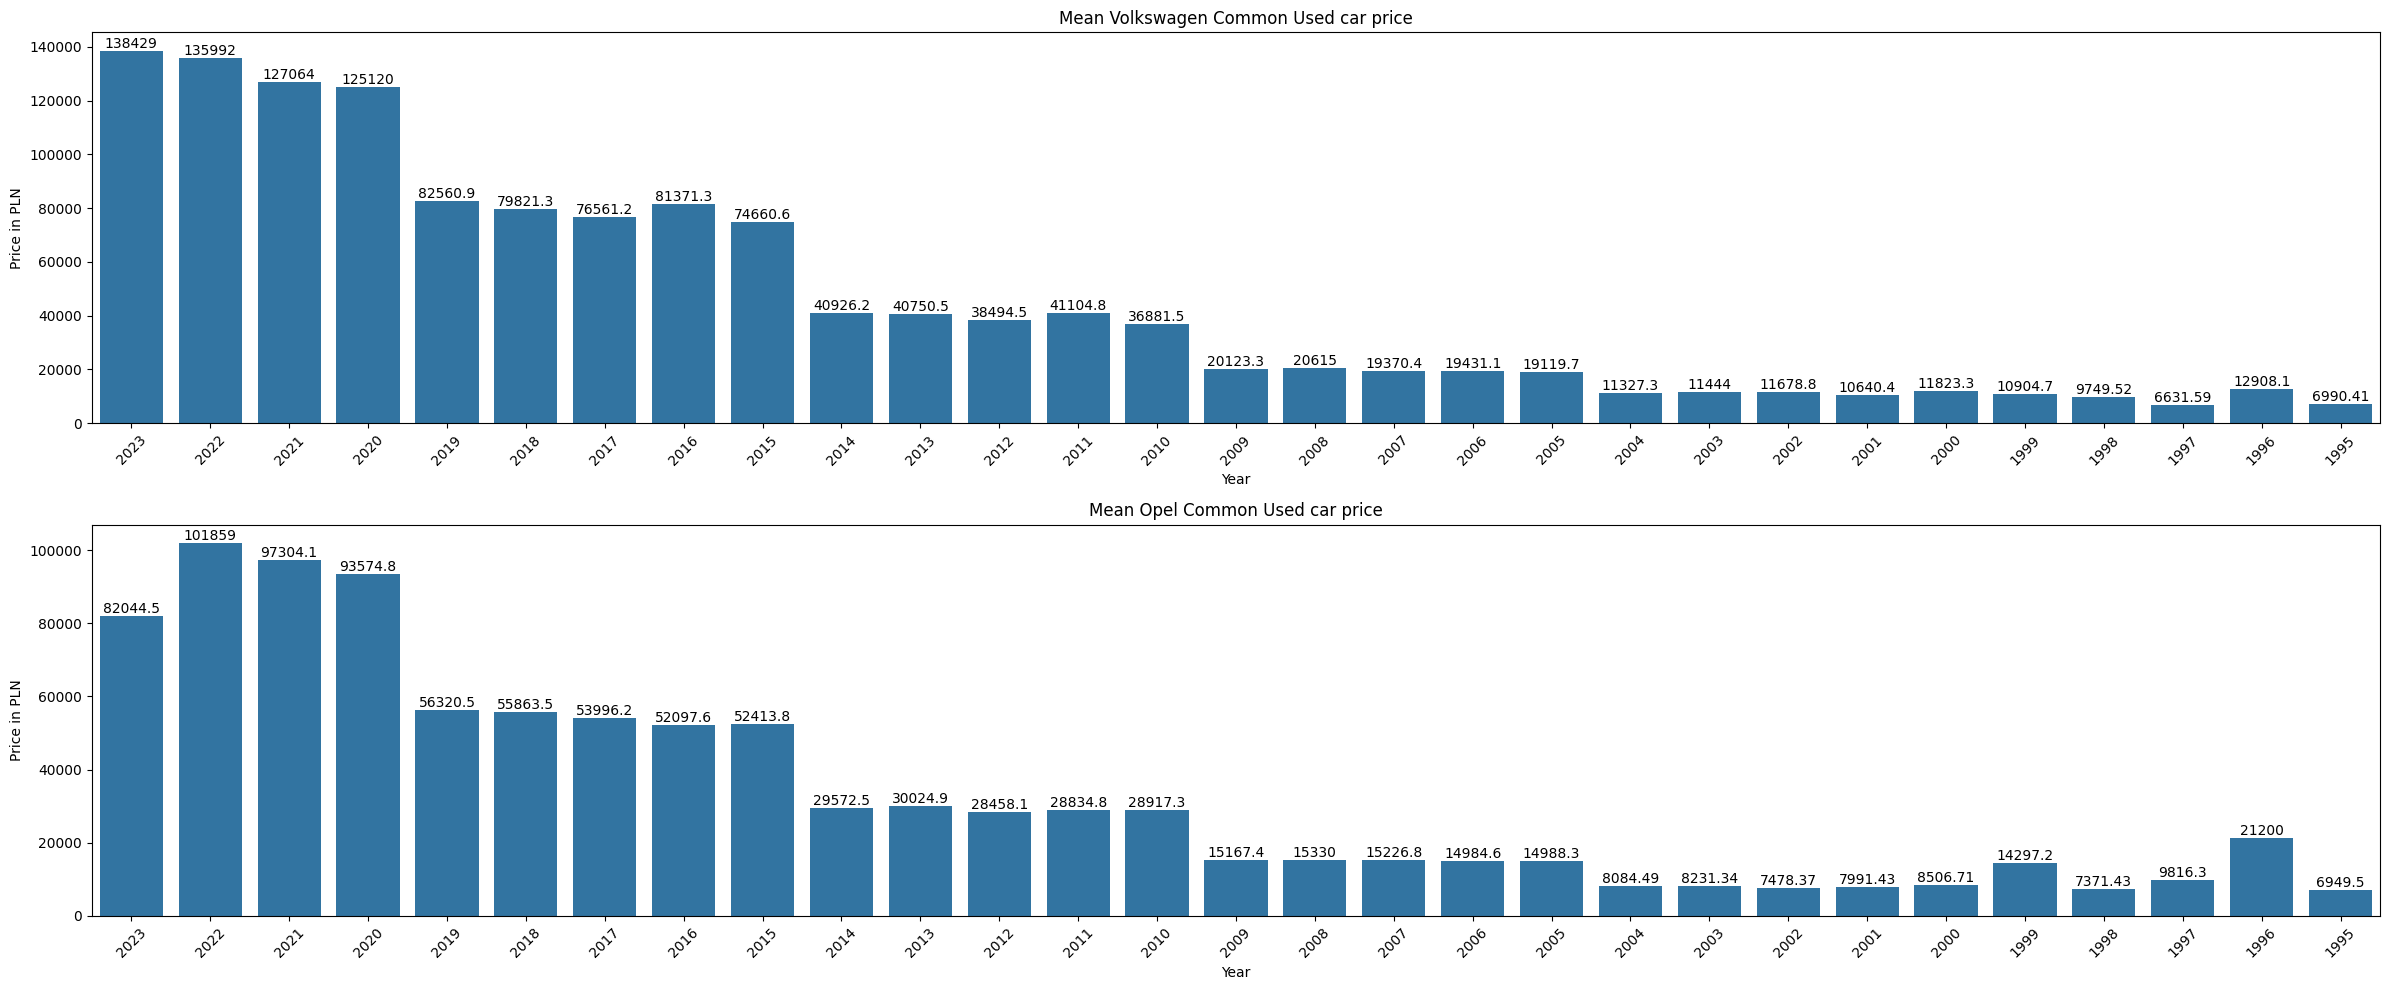

In [144]:
fig = plt.figure(figsize=(24,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.barplot(volks_used, x=volks_used.index, y='mean' , order=list(volks_used.index))
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Mean Volkswagen Common Used car price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price in PLN')
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(opel_used, x=opel_used.index, y='mean', order=list(opel_used.index))
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Mean Opel Common Used car price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price in PLN')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()


In Poland, leasing and renting are popular financing options, usually with durations of 2-7 years. This creates a predictable supply of cars entering the used car market after their lease or rental terms end.

We can notice a Significant Price Drop:

The 40% price difference between 1-4 year-old cars and 4-8 year-old cars reflects depreciation, which is steepest in the first few years of a car's life.
This pattern indicates that many buyers find value in slightly older cars (4-8 years old), which offer a balance between reliability and affordability.

## Categorize Common Cars by engine Capacity

We can categorize our dataset by engine capacity and inspect the trends of Common Used cars.
Let's create 7 types of engines:
- Incorrect value 
- Below 1 L (less then 999cmm)
- 1 - 1.6 L (1000cmm to 1599 cmm)
- 1.6 - 2 L (1599cmm to 1999cmm)
- 2 - 3 L (2000cmm to 2999cmm)
- 3 - 4 L (3000cmm to 3999cmm)
- 4 + L (more than 4000cmm)


In [145]:
#categorize by engine capacity
common_cars['engine_capacity_category'] = pd.cut(common_cars['engine_capacity'], 
       bins = [0 ,400, 1000, 1600, 2000, 3000, 4000, 10000], 
       include_lowest = True, 
       labels = ['incorrect value', 'below 1L','1L-1.6L', '1.6L-2L', '2L-3L', '3L-4L', '4+L'])
common_cars.head()

,brand,model,price_in_pln,gearbox,city,voivodeship,year,mileage,engine_capacity,fuel_type,car_market,engine_capacity_category
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,manual,Łask,Łódzkie,1998,133760.0,1970.0,Benzyna,Used,1.6L-2L
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,manual,Mława,Mazowieckie,1998,133760.0,1970.0,Benzyna,Used,1.6L-2L
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,manual,Chełmża,Kujawsko-pomorskie,1996,227000.0,1970.0,Benzyna,Used,1.6L-2L
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,manual,Jasło,Podkarpackie,1996,227000.0,1970.0,Benzyna,Used,1.6L-2L
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,manual,Pabianice,Łódzkie,1995,239000.0,1995.0,Benzyna+LPG,Used,1.6L-2L


In [146]:
common_cars.groupby('engine_capacity_category')['price_in_pln'].agg(['count', 'mean', 'std', 'min', 'max'])

C:\Users\kosty\AppData\Local\Temp\ipykernel_20284\3902967950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_cars.groupby('engine_capacity_category')['price_in_pln'].agg(['count', 'mean', 'std', 'min', 'max'])


,count,mean,std,min,max
engine_capacity_category,,,,,
incorrect value,10,123710.000000,43705.337838,49900.0,184900.0
below 1L,5305,64047.619416,38793.303264,1111.0,199900.0
1L-1.6L,35750,51983.780923,40044.650694,1230.0,199999.0
1.6L-2L,28853,61705.993484,49791.931642,1500.0,199999.0
2L-3L,9528,62511.143787,52184.321302,1300.0,199999.0
3L-4L,1974,62290.428065,48553.015580,3000.0,199999.0
4+L,1778,75341.375703,53268.500110,2100.0,199999.0


### Engine Capacity Category Analysis for Common Used Cars

In this analysis, we examine how **engine capacity** influences both the **distribution** of cars across different engine categories and their **average price**. Specifically, we:

1. **Count the number of cars** in each engine capacity category and display this as a **percentage** of the total dataset.
2. **Visualize the relationship** between engine capacity categories and the average price of the cars in these categories.

The following steps and visualizations were created:

1. **Engine Capacity Distribution**: A bar plot shows the distribution of common cars across different engine capacity categories. We calculate the percentage of cars in each category to provide insight into the market composition for these cars.
2. **Price by Engine Capacity**: A box plot illustrates the relationship between engine capacity categories and the price of common cars. This allows us to see how the prices are distributed within each category and identify any significant trends or outliers.

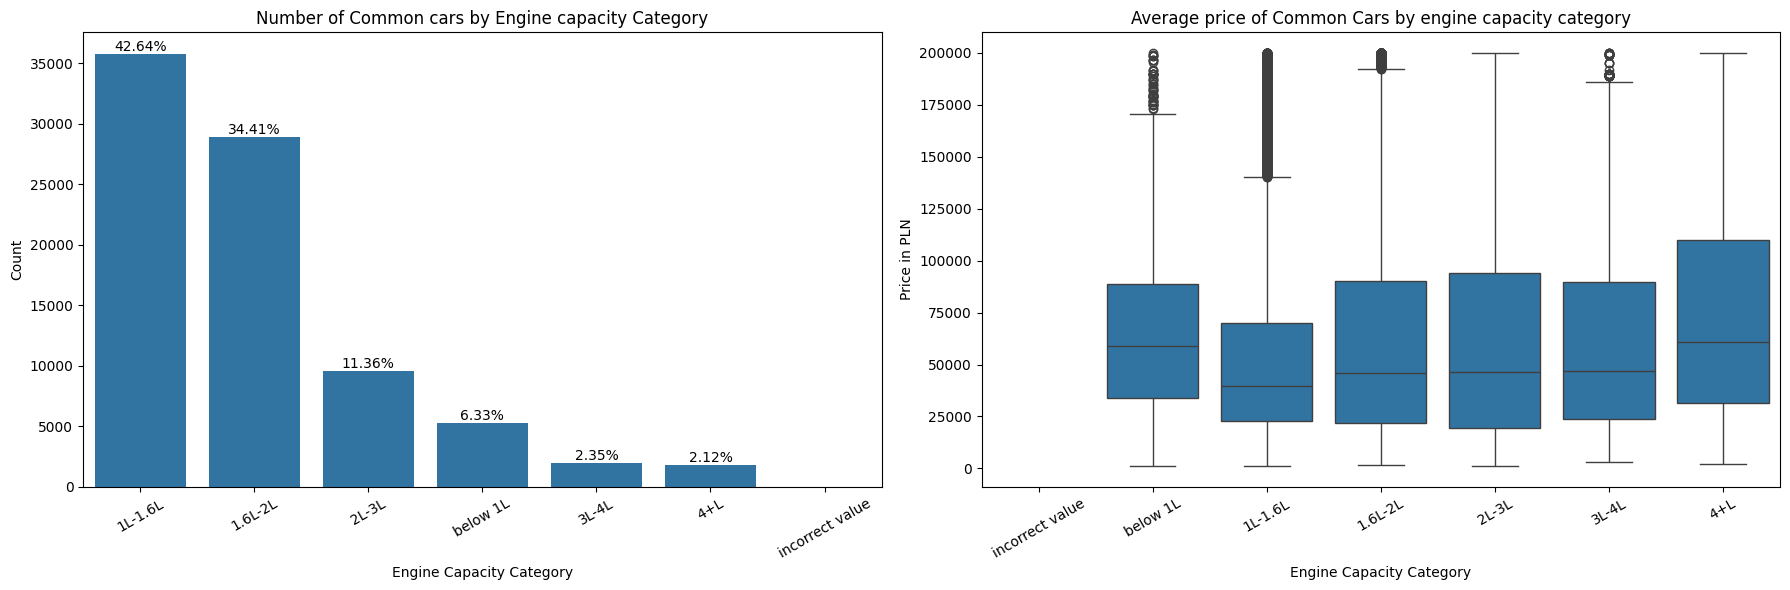

In [170]:
temp = common_cars[common_cars['engine_capacity_category'] != 'incorrect value']['engine_capacity_category'].value_counts(normalize = True)
fig = plt.figure(figsize = (18,6))
ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(common_cars[common_cars['engine_capacity_category'] != 'incorrect value'] ,x = 'engine_capacity_category', order = temp.index);
ax1.tick_params(axis = 'x', labelrotation=30)

if ax1.patches:
    for container in ax1.patches:
        # Add percentage labels on top of bars
        height = container.get_height()
        label = f"{(height / len(common_cars[common_cars['engine_capacity_category'] != 'incorrect value'])) * 100:.2f}%"
        ax1.text(container.get_x() + container.get_width() / 2, height, label, ha="center", va="bottom", fontsize=10)

ax1.set_title('Number of Common cars by Engine capacity Category')
ax1.set_xlabel('Engine Capacity Category')
ax1.set_ylabel('Count')
del temp

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(common_cars[common_cars['engine_capacity_category'] != 'incorrect value'], x = 'engine_capacity_category', y = 'price_in_pln')
ax2.tick_params(axis = 'x', labelrotation = 30)
ax2.set_title('Average price of Common Cars by engine capacity category')
ax2.set_xlabel('Engine Capacity Category')
ax2.set_ylabel('Price in PLN')

plt.tight_layout()

The majority of cars in Poland (approximately 75%) are in the 1.0L-2.0L engine category. This suggests that mid-range engine sizes are the most commonly preferred or practical choice for Polish consumers.

Cars with engines in the 1.0L-2.0L range typically offer a good balance between performance and fuel efficiency. This is ideal for a variety of driving conditions, including city driving and longer commutes.
Additionally, cars in this engine range are often more affordable in terms of both purchase price and running costs (fuel, maintenance, insurance), which might explain their popularity.

The high prevalence of these engine sizes suggests that Polish buyers may prioritize vehicles that are cost-effective, efficient, and practical for everyday use.
Manufacturers might target this segment more heavily, offering a variety of models with these engine capacities to meet market demand.

### Regional Analysis of Common Used Cars

In this section, we analyze the distribution of **common used cars** across different **voivodeships** (regions) in Poland. By grouping the dataset by voivodeship, we are able to observe:

1. **The count of cars** available in each region.
2. **The average price** of cars in each voivodeship.
3. **The standard deviation**, **minimum**, and **maximum** prices, which provide insight into the variability and price range within each region.

The following code groups the dataset by `voivodeship` and calculates these statistics:

In [171]:
region_df = common_cars.groupby('voivodeship')['price_in_pln'].agg(['count', 'mean', 'std', 'min', 'max']).sort_values(by = 'count', ascending = False)
region_df

,count,mean,std,min,max
voivodeship,,,,,
Mazowieckie,16358,62639.636447,47862.635303,1500.0,199999.0
Wielkopolskie,11531,55589.596739,44081.741231,1600.0,199999.0
Śląskie,10146,62380.448255,47409.321140,1500.0,199999.0
Małopolskie,7243,59363.333702,45647.475569,1800.0,199998.0
Dolnośląskie,6391,55636.753247,46846.013851,1230.0,199900.0
Pomorskie,5026,61410.583963,48273.110624,1111.0,199999.0
Łódzkie,4989,59694.871517,47337.522959,1500.0,199999.0
Kujawsko-pomorskie,3594,59620.755982,47257.509511,1300.0,199999.0
Lubelskie,3109,49921.149566,38091.103911,1300.0,199900.0


We can observe that some entries represent cities that are not Polish voivodeships, such as Berlin and Prague. Let's filter the data to include only Polish voivodeships.

In [ ]:
region_df_pl = region_df[region_df['count']>25]
region_df_pl

,count,mean,std,min,max
voivodeship,,,,,
Mazowieckie,16358,62639.636447,47862.635303,1500.0,199999.0
Wielkopolskie,11531,55589.596739,44081.741231,1600.0,199999.0
Śląskie,10146,62380.448255,47409.321140,1500.0,199999.0
Małopolskie,7243,59363.333702,45647.475569,1800.0,199998.0
Dolnośląskie,6391,55636.753247,46846.013851,1230.0,199900.0
Pomorskie,5026,61410.583963,48273.110624,1111.0,199999.0
Łódzkie,4989,59694.871517,47337.522959,1500.0,199999.0
Kujawsko-pomorskie,3594,59620.755982,47257.509511,1300.0,199999.0
Lubelskie,3109,49921.149566,38091.103911,1300.0,199900.0


### Regional Distribution of Used Cars: Price and Count

In this analysis, we aim to understand the relationship between the **average price** of cars and the **number of cars** available in each **voivodeship (region)** in Poland. By creating bar plots, we can visually compare these metrics across different regions.

The following code generates two bar plots:
1. **Average Price of Cars by Voivodeship**: This plot shows the mean price of used cars available in each region.
2. **Number of Cars by Voivodeship**: This plot visualizes the number of cars listed for sale in each region.


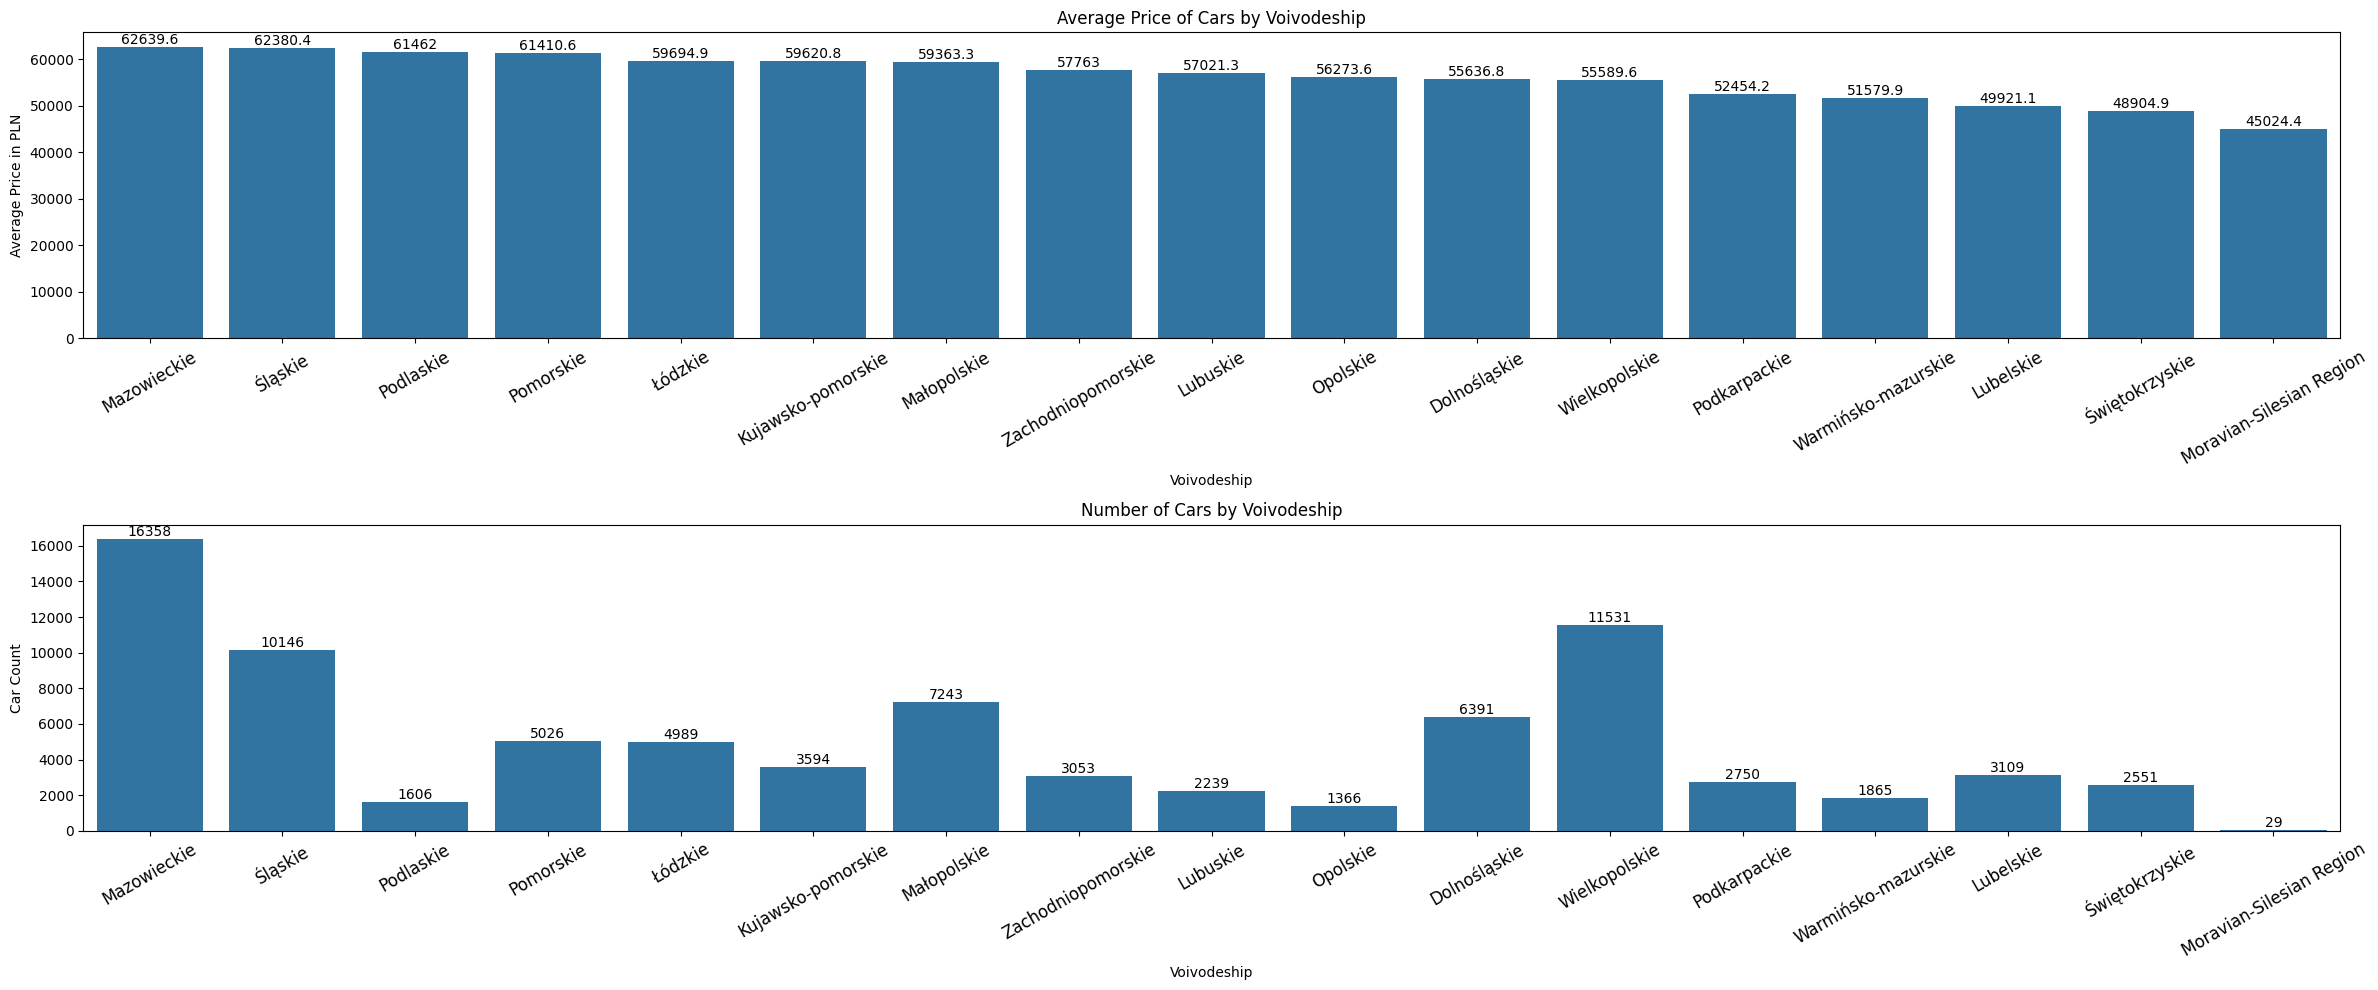

In [199]:
# Create the barplot with the ordered voivodeships
fig = plt.figure(figsize=(24,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.barplot(region_df_pl, x=region_df_pl.index, y='mean', order=region_df_pl.sort_values('mean', ascending=False).index)
ax1.tick_params(axis='x', labelrotation=30, labelsize=12)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Average Price of Cars by Voivodeship')
ax1.set_xlabel('Voivodeship')
ax1.set_ylabel('Average Price in PLN')

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(region_df_pl, x=region_df_pl.index , y='count', order=region_df_pl.sort_values('mean', ascending=False).index)
ax2.tick_params(axis='x', labelrotation=30, labelsize=12)
ax2.bar_label(ax2.containers[0])
ax2.set_title('Number of Cars by Voivodeship')
ax2.set_xlabel('Voivodeship')
ax2.set_ylabel('Car Count')
# Adjust layout to prevent overlap
plt.tight_layout()


Mazowieckie and Wielkopolskie lead both in car prices and availability, reflecting the larger automotive market and higher purchasing power in these regions.
There is a significant relationship between the economic activity of a voivodeship and both the supply and pricing of cars, which should inform future marketing, pricing, and sales strategies for dealerships and individuals in the Polish car market.

### Data Visualization for a Specific Car Brand

The `data_brand` function generates multiple visualizations that provide insights into the distribution and characteristics of used cars for a specific brand. The function takes two arguments:
- **database**: The dataset containing the car data.
- **brand**: The brand of the cars to analyze.

#### Visualizations Generated:
The function creates a grid of 9 plots (3x3) with the following analyses:

1. **Price Distribution**: A histogram (`histplot`) showing the distribution of car prices for the specified brand.
2. **Number of Cars by Year**: A count plot (`countplot`) displaying the number of cars available for each production year.
3. **Number of Cars by Fuel Type**: A count plot for the fuel type, showing how many cars of each fuel type are available for the brand.
4. **Number of Cars by Engine Capacity**: A count plot showing the distribution of cars by engine capacity category (e.g., small, medium, large).
5. **Number of Cars by Gearbox Type**: A count plot for the gearbox type, showing the distribution of available cars by their gearbox type (e.g., manual, automatic).
6. **Price by Gearbox Type**: A box plot showing the distribution of car prices grouped by gearbox type, to understand how gearbox affects pricing.
7. **Mean Price by Year**: A bar plot showing the average car price for each year of production, helping identify how prices change by year.
8. **Mean Price by Fuel Type**: A bar plot showing the average car price for each fuel type, helping to analyze price trends based on fuel type.
9. **Price by Engine Capacity**: A box plot showing the distribution of car prices for each engine capacity category.


In [286]:
def data_brand(database, brand):
    brand_df = database[database['brand']==brand]
    fig = plt.figure(figsize = (20, 16))
    ax1 = plt.subplot(3,3,1)
    ax1 = sns.histplot(brand_df, x='price_in_pln', bins=16)
    ax1.bar_label(ax1.containers[0])
    ax1.tick_params(axis='x', labelrotation=30)
    ax1.set_xlabel('Price in PLN')
    ax1.set_title('Distribution by price')

    ax2 = plt.subplot(3,3,2)
    ax2 = sns.countplot(brand_df, x='year')
    ax2.tick_params(axis='x', rotation = 45, labelsize = 8)
    ax2.set_title('Number of Cars by Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Count')

    ax3 = plt.subplot(3,3,3)
    ax3 = sns.countplot(brand_df, x='fuel_type')
    ax3.bar_label(ax3.containers[0])
    ax3.tick_params(axis='x', rotation=15)
    ax3.set_title('Number of cars by Fuel Type')
    ax3.set_xlabel('Fuel Type')
    ax3.set_ylabel('Count')

    ax4 = plt.subplot(3,3,4)
    ax4 = sns.countplot(brand_df, x='engine_capacity_category')
    ax4.bar_label(ax4.containers[0])
    ax4.tick_params(axis='x', rotation=30)
    ax4.set_title('Number of Cars by Engine Capacity')
    ax4.set_xlabel('Engine Capacity Category')
    ax4.set_ylabel('Count')

    ax5 = plt.subplot(3,3,5)
    ax5 = sns.countplot(brand_df, x='gearbox')
    ax5.bar_label(ax5.containers[0])
    ax5.tick_params(axis='x', rotation=30)
    ax5.set_title('Number of Cars by Gearbox')
    ax5.set_xlabel('Gearbox')
    ax5.set_ylabel('Count')

    ax6 = plt.subplot(3,3,6)
    ax6 = sns.boxplot(brand_df, x='gearbox', y='price_in_pln')
    ax6.tick_params(axis='x', rotation=30)
    ax6.set_title('Mean price of Cars by Gearbox')
    ax6.set_xlabel('Gearbox')
    ax6.set_ylabel('Price in PLN')

    ax7 = plt.subplot(3,3,7)
    ax7 = sns.barplot(brand_df, x='year', y='price_in_pln')
    ax7.tick_params(axis='x', rotation=45,labelsize = 8)
    ax7.set_title('Mean price of Cars by Year')
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Price in PLN')

    ax8 = plt.subplot(3,3,8)
    ax8 = sns.barplot(brand_df, x='fuel_type', y='price_in_pln')
    ax8.bar_label(ax8.containers[0], label_type='center', color='white')
    ax8.tick_params(axis='x', rotation=15)
    ax8.set_title('Mean price of Cars by Fuel Type')
    ax8.set_xlabel('Fuel Type')
    ax8.set_ylabel('Price in PLN')

    ax9 = plt.subplot(3,3,9)
    ax9 = sns.boxplot(brand_df, x='engine_capacity_category', y='price_in_pln')
    ax9.tick_params(axis='x', rotation=30)
    ax9.set_title('Mean price of Cars by Engine Capacity categorie')
    ax9.set_xlabel('Engine Capacity Category')
    ax9.set_ylabel('Price in PLN')

    plt.tight_layout()

### Brand Data Analysis: Skoda

In this section, we analyze the used cars from the brand *Skoda* in our dataset `common_cars`. The `data_brand` function is designed to visualize key insights about Skoda cars, focusing on various features such as price distribution, car count by year, fuel type, engine capacity, gearbox, and more. The function generates the following plots:

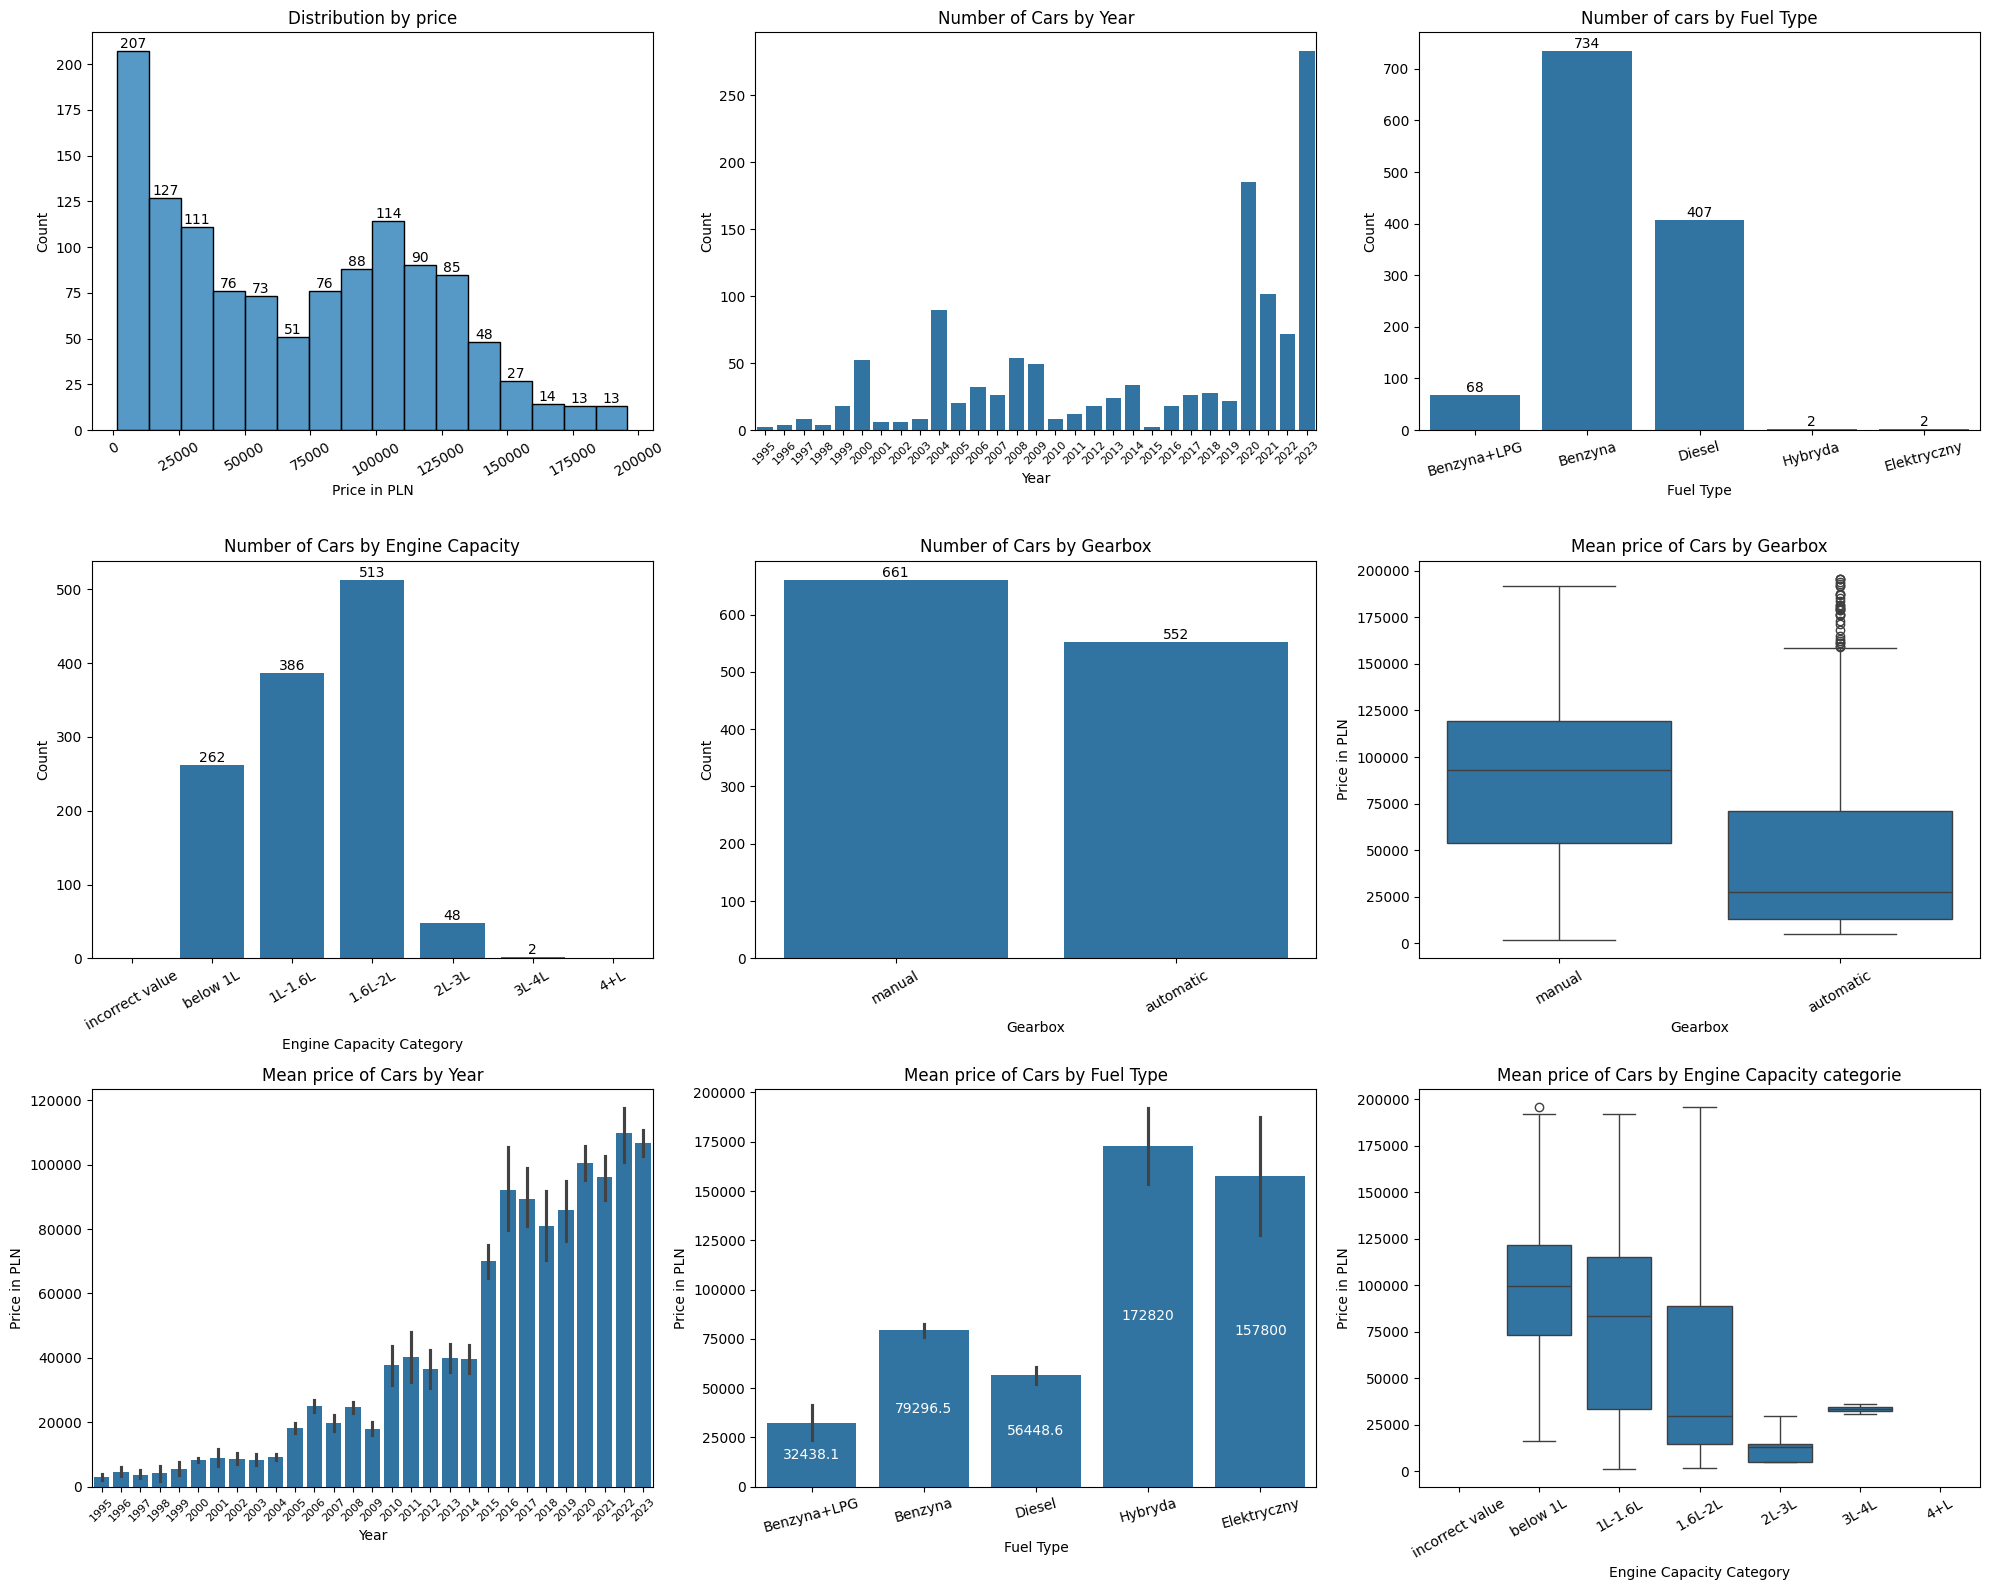

In [287]:
data_brand(common_cars,'skoda')

This analysis provides a detailed breakdown of a specific car brand's market trends. Here’s how you can use these insights:

Understand Market Dynamics:
By visualizing the price distribution, you can identify where most cars are positioned, helping buyers and sellers understand the brand's pricing strategy.

Identify Popular Features:
The analysis highlights the most common fuel types, engine capacities, and gearboxes, providing insights into customer preferences and the brand's focus.

Price Optimization:
The charts showing mean prices by year, fuel type, and gearbox can guide sellers to price their cars competitively based on these features. Buyers can also use this information to negotiate or budget for specific configurations.

Make Informed Purchase Decisions:

Buyers: Use the data to decide whether a newer model or an alternative fuel option is worth the additional cost.
Sellers/Dealers: Understand which categories (e.g., engine size or gearbox) drive sales to optimize inventory and marketing strategies.
Spot Investment Opportunities:
If you’re looking to buy and resell, focus on cars that align with popular features but fall within the lower range of the price distribution.

Strategize for Sustainability:
With rising demand for alternative fuels, promoting hybrids or electric cars could align with future market trends.



## Relationship Between Price and Age/Mileage/Engine Capacity

Exploratory analysis indicates that the impact of age, mileage, or engine capacity on price is relatively minor. To confirm this observation, let’s visualize the relationship between price and year, mileage, and engine capacity.

In [ ]:
# Specify the columns you want to include in the correlation calculation
selected_columns = ['price_in_pln', 'year', 'mileage', 'engine_capacity']

# Calculate the correlation matrix for these columns
common_cars[selected_columns].corr()

,price_in_pln,year,mileage,engine_capacity
price_in_pln,1.000000,0.653280,-0.523915,0.106294
year,0.653280,1.000000,-0.670767,-0.217111
mileage,-0.523915,-0.670767,1.000000,0.209577
engine_capacity,0.106294,-0.217111,0.209577,1.000000


### Correlation Heatmap

The correlation heatmap is a visual representation of the pairwise correlation coefficients between numerical features in the dataset. It helps identify relationships between variables, which can be important for feature selection and understanding how different features interact.

- **The Heatmap**: The heatmap uses a color scale, where values close to 1 indicate a strong positive correlation (shown in red), values close to -1 indicate a strong negative correlation (shown in blue), and values around 0 show weak or no correlation (shown in lighter colors).
  
- **Annotations**: Each cell in the heatmap is annotated with the correlation coefficient, which ranges from -1 to 1. A value of 1 indicates that two variables are perfectly positively correlated, while -1 indicates a perfect negative correlation, and 0 means no correlation.


Text(0.5, 1.0, 'Correlation Heatmap')

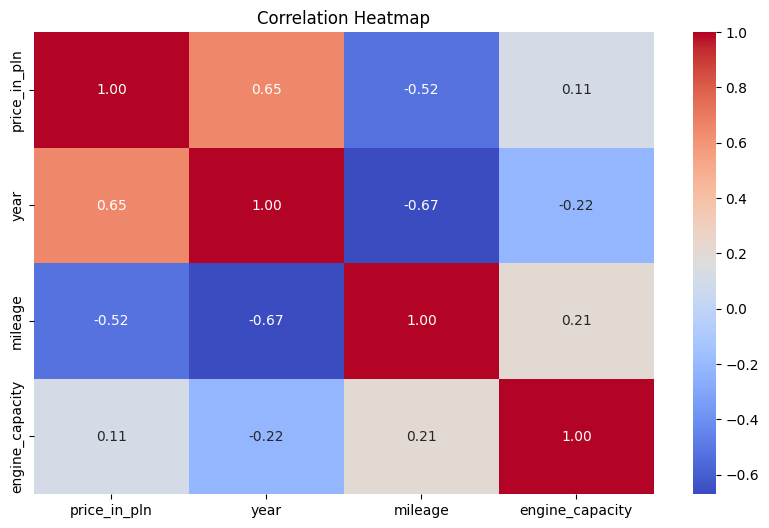

In [292]:
plt.figure(figsize=(10, 6))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

### Relationships Between Car Features and Price

In this section, we explore the relationships between various car features and their price for the "Used" cars in the dataset. Specifically, we are analyzing how the following features impact car prices:

1. **Year of Manufacture vs. Price**:
   The first plot explores the relationship between the year of manufacture and the price of the cars. We expect to see a general trend, where newer cars might have a higher price, though this can also be influenced by other factors like model, brand, and condition.

2. **Mileage vs. Price**:
   The second plot shows how mileage correlates with car price. Typically, cars with lower mileage tend to be priced higher as they are perceived to have less wear and tear.

3. **Engine Capacity vs. Price**:
   The third plot displays the relationship between engine capacity and car price. Generally, cars with larger engine capacities may have higher prices due to their performance capabilities.

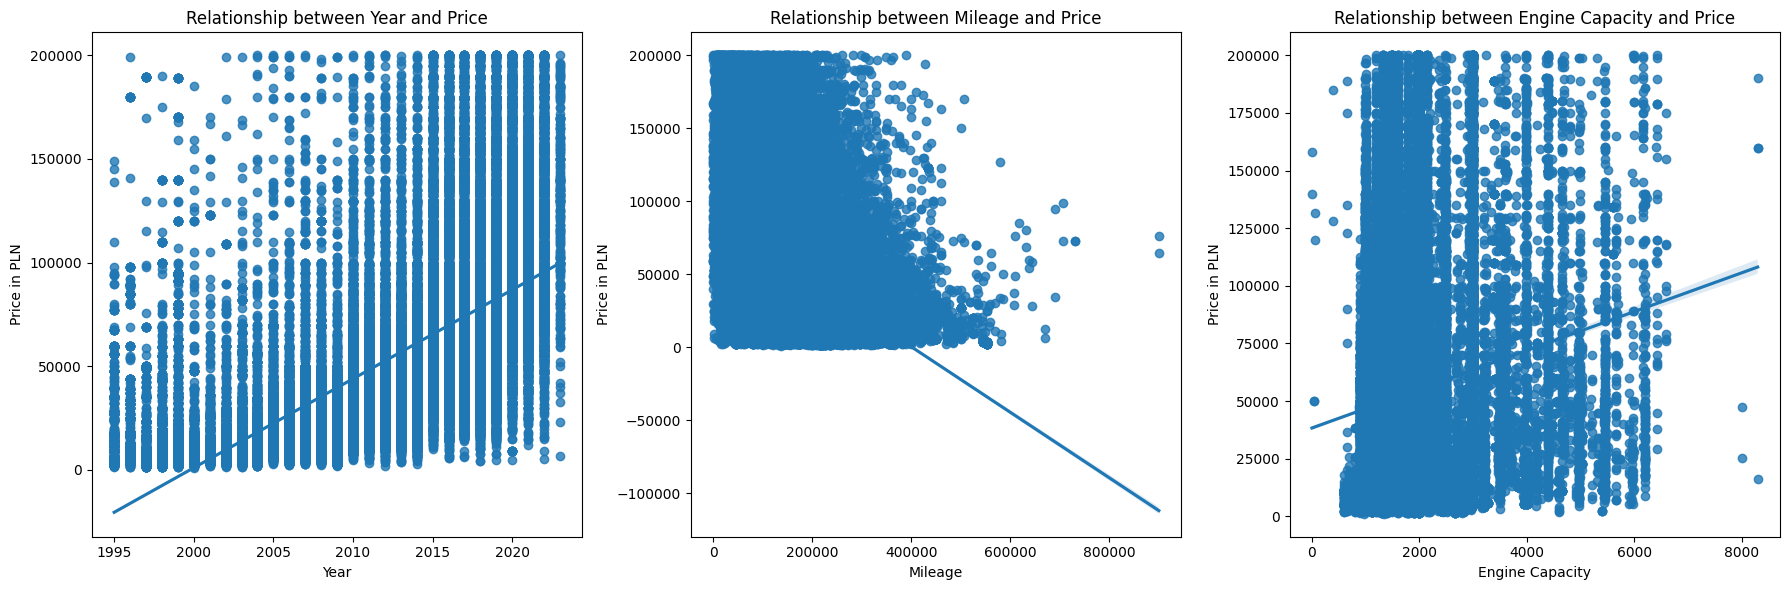

In [299]:
fig = plt.figure(figsize=(18, 6))

# Relationship between year and price
ax1 = plt.subplot(1, 3, 1)
sns.regplot(data=common_cars[common_cars['car_market']=='Used'], x='year', y='price_in_pln', ax=ax1)
ax1.set_title('Relationship between Year and Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price in PLN')

# Relationship between mileage and price
ax2 = plt.subplot(1, 3, 2)
sns.regplot(data=common_cars[common_cars['car_market']=='Used'], x='mileage', y='price_in_pln', ax=ax2)
ax2.set_title('Relationship between Mileage and Price')
ax2.set_xlabel('Mileage')
ax2.set_ylabel('Price in PLN')

# Relationship between engine capacity and price
ax3 = plt.subplot(1, 3, 3)
sns.regplot(data=common_cars[common_cars['car_market']=='Used'], x='engine_capacity', y='price_in_pln', ax=ax3)
ax3.set_title('Relationship between Engine Capacity and Price')
ax3.set_xlabel('Engine Capacity')
ax3.set_ylabel('Price in PLN')

plt.tight_layout()



# Conclusion

Based on the detailed exploratory analysis conducted on the "Used Cars" dataset, several insights can be drawn regarding the factors influencing car prices and the distribution of car attributes. Here's a summary of the key findings:

## 1. Price Distribution and Outliers
- The price distribution of cars shows a wide range, with significant outliers, especially in the higher price brackets. There is a clear distinction between *common cars* (those with a price below PLN 200,000) and *luxury cars* (with prices exceeding PLN 200,000), which can be attributed to brand, model, and other premium features.
- The boxplots reveal that the price distribution is highly skewed, especially for new cars, where some luxury vehicles fetch extremely high prices.

## 2. Impact of Car Features on Price
- **Year of Manufacture**: Newer cars generally have a higher price, but there are exceptions based on the car's brand, model, and condition.
- **Mileage**: Cars with lower mileage tend to be priced higher. This is consistent with the general expectation that less-used cars are more valuable due to better condition and lower wear and tear.
- **Engine Capacity**: Larger engine capacities are associated with higher car prices. This trend suggests that cars with more powerful engines (e.g., luxury and performance models) command a premium price.
- **Fuel Type and Gearbox**: The price distribution also varies by fuel type (e.g., diesel vs. gasoline) and gearbox (manual vs. automatic). Cars with automatic transmissions or certain fuel types (like electric) can have higher prices, depending on the market and brand preferences.

## 3. Regional Variations
- There are significant regional differences in both car prices and the number of cars available for sale. The data suggests that certain regions have higher average prices, which may be linked to the economic conditions, demand, and car brand preferences within those areas. For instance, more affluent regions tend to have higher-priced cars on average.

## 4. Brand-Specific Insights
- The analysis of specific brands (e.g., Skoda, Volkswagen, and Opel) indicates varying price trends. For example, Volkswagen cars are generally priced higher in the market compared to other common brands, especially for newer models. The price variations are also evident when breaking down by factors like engine capacity and gearbox type.
- Certain brands have higher car counts in specific categories, but this does not always correlate with the price—indicating that factors like demand, brand reputation, and car features play an important role in determining market price.

## 5. Correlation Insights
- The correlation analysis between different features of the cars (e.g., engine capacity, year, mileage) and their prices shows how strongly these factors are related. For example, engine capacity and year of manufacture have a stronger positive correlation with price than mileage, indicating that higher-powered cars and newer models are more likely to be priced higher.

---

## Recommendations

- **For Buyers**: When purchasing a used car, consider the mileage, engine capacity, and year of manufacture as key factors influencing price. Brands with larger engine capacities, especially luxury brands, tend to have higher prices.
  
- **For Sellers**: Sellers in regions with higher demand can potentially command higher prices, especially for newer models with low mileage. Offering cars with desirable features (e.g., automatic transmissions, electric fuel types) can also increase sale prices.
  
- **For Future Analysis**: It would be useful to further clean and categorize the data, especially for attributes like models, and perform more granular regional analysis to understand localized market trends.

---

## Final Thoughts

This analysis provides valuable insights into the used car market, highlighting the importance of car features, brand reputation, and regional demand in determining car prices. While many of the trends are as expected (newer cars being more expensive, lower mileage cars being more valuable), several interesting patterns, particularly regarding regional and brand-specific trends, reveal the complexity of the market. For anyone buying or selling used cars, understanding these dynamics can help make more informed decisions.

---

## Market Insights on Engine Capacity

The fact that approximately 75% of cars in Poland have engine capacities between **1.0L and 2.0L** underscores a significant trend in the used car market. This finding highlights a **preference for affordable, efficient, and practical vehicles**. The typical Polish car buyer appears to prioritize a balance of **performance, economy, and cost-efficiency**, which aligns with the widespread popularity of vehicles in this engine size category.

### Implications for the Market

- **Affordability and Fuel Efficiency**: Cars in the 1.0L to 2.0L range are typically more fuel-efficient, which makes them an attractive option for the cost-conscious buyer. These vehicles are often cheaper to run, maintain, and insure, contributing to their popularity in Poland.
  
- **Versatility**: This engine size is versatile enough to cater to a wide range of driving needs, from urban commuting to longer journeys. As such, it is well-suited to the demands of Polish consumers who value practicality and everyday usability.
  
- **Manufacturer Strategy**: Car manufacturers are likely aware of this preference and may tailor their offerings to meet the demand for vehicles in this engine category. This could explain the availability of a broad selection of models in the 1.0L to 2.0L range, ensuring they capture the attention of potential buyers seeking an optimal balance between performance and cost.

In summary, the dominance of the 1.0L to 2.0L engine capacity range in Poland's used car market is a clear indication of buyer preferences for practicality and value. This trend provides useful insights for both car buyers and manufacturers looking to navigate the Polish automotive landscape.
